<a id="ID_intr"></a>
INDEX | [1.0 Intro](#ID_intr) | [2.0 Lit. Review](#ID_lit) | [3.0 Research Question](#ID_research) | [4.0 Methodology](#ID_method) | [5.0 Data Understanding and Exploration](#ID_data) | [6.0 Model Building and Improvement](#ID_model) | [7.0 Results and Discussion](#ID_result) | [8.0 Conclusion](#ID_conclusion) | [Bibliography](#ID_biblio)  

## 1.0 | Introduction

Banks and Post office are distinct entities providing specific services in the community. Banks handle financial transactions like savings, deposits, and withdrawals, while post offices focus on sending mail and packages. However, in recent efforts to streamline services and reduce cost, banks have closed their branches in the vicinity of trading post offices that offer banking services. In the UK, 11500 post office branches offer everyday personal and business banking services to the customers of more than 30 banks and building societies. (Everyday banking) For potentially closing a bank branch one of the prerequisite could be location of trading post office and its distance from the branch. Banks that are keen on cost reduction without compromising customer service could use this strategy to use trading post office as an alternative banking service provider to their customers in the absense of a dedicated branch.

 This paper outlinestthe method  and results of an explorator  analysi to evalate past trends of branch closure in the vicinity of trading post office locations. The paper also recommends best Supervised Classification machine learning model to classify branches as candidate for potential closure based on parent bank, region and availability of trading post office in the vicinity. 

Banking Retail Points is an open data set provided by Geolytix, focusing on the locations of bank and building society branches across the UK. This dataset includes both current and closed (since 2015) branch locations for banks with more than 10 branches. Each entry in the dataset includes details such as store name, address (including postcode), latitude, longitude, the branch’s permanent closure date (if applicable), and the distance to the nearest currently trading Post Office (closed branches use the currently trading post office locations).(Geolytix).




<a id="ID_lit"></a>
INDEX | [1.0 Intro](#ID_intr) | [2.0 Lit. Review](#ID_lit) | [3.0 Research Question](#ID_research) | [4.0 Methodology](#ID_method) | [5.0 Data Understanding and Exploration](#ID_data) | [6.0 Model Building and Improvement](#ID_model) | [7.0 Results and Discussion](#ID_result) | [8.0 Conclusion](#ID_conclusion) | [Bibliography](#ID_biblio)  

## 2.0 | Literature Review

The retail banking sector in the United Kingdom has undergone significant changes, including branch closures. Competition and the presence of alternative banking facilities, such as Post Office branches, influence closure likelihood. (Clark, 2023)

•	The UK retail banking market is characterized by a mix of traditional banks and building societies.

•	While the Prudential Regulatory Authority recognizes a total of 160 banks and 43 building societies, the market is dominated by approximately 20 major players.

•	These major players include Barclays, Santander, NatWest, Lloyds Banking Group, and HSBC.

•	Together, they command a substantial 77% share of the retail banking marke (Bank of England, 2023)

The UK Government uses the Post Office to distribute welfare payments through its extensive network of access points.(The Post Office Network Report 2021) The UK government also aim to provide ‘universal banking services’ through the post office network for the past two decades. To achieve this, they’ve implemented various policies and mechanisms. One such mechanism involves defining six official criteria for post office access, based on the percentage of the UK population living within one mile, three miles, and six miles of a post office. (Sonea,2021). 

Another study, conducted by the University of Sheffield's Centre for Research into Accounting and Finance in Context and the University of Bristol's Personal Finance Research Centre, reveals the impact of bank closures on Post Office services in the UK. One in ten UK Post Offices has been affected by a nearby bank closure within a 1km radius, leading to a 27% increase in demand for cash deposit services. Areas with a higher number of bank branches, predominantly urban regions, have experienced a greater number of closures.

The closure of multiple bank branches in the same area resulted in a higher increase (58%) in Post Office deposit volumes. The study highlights that individuals and businesses seek alternative methods, such as Post Office services, for cash deposits when local banks close.  It underscores the importance of maintaining access to cash services, particularly in communities affected by bank closures (B the above questions.
 questions.


<a id="ID_research"></a>
INDEX | [1.0 Intro](#ID_intr) | [2.0 Lit. Review](#ID_lit) | [3.0 Research Question](#ID_research) | [4.0 Methodology](#ID_method) | [5.0 Data Understanding and Exploration](#ID_data) | [6.0 Model Building and Improvement](#ID_model) | [7.0 Results and Discussion](#ID_result) | [8.0 Conclusion](#ID_conclusion) | [Bibliography](#ID_biblio)

## 3.0 | Research Question

This paper attempts to answer the research questions as below.

        * RQ1: Are certain banks or regions more susceptible to branch closures based on there proximity to post office?
        * RQ2: To what extent does the proximity of a bank branch to a post office influence its closure? 
        * RQ3: Which branches are candidate for closure based on proximity to post office?


<a id="ID_method"></a>
INDEX | [1.0 Intro](#ID_intr) | [2.0 Lit. Review](#ID_lit) | [3.0 Research Question](#ID_research) | [4.0 Methodology](#ID_method) | [5.0 Data Understanding and Exploration](#ID_data) | [6.0 Model Building and Improvement](#ID_model) | [7.0 Results and Discussion](#ID_result) | [8.0 Conclusion](#ID_conclusion) | [Bibliography](#ID_biblio)

## 4.0 | Methodology

The methodology for current research include following:

1. Data Understanding 

* Importing raw data into a dataframe
* Understand data features (definition), data types, shape, descriptive statitics
* Identify data gaps (e.g. NaNs)
* Imputing missing/unexpected values in the dataframe
* Dropping undesired columns

2. Data Analysis 

* Visualization using suitable techniques and tools such box plot, bar charts, pie charts etc.
* Checking for any outliers in the po_dist variable. 
* Encoding categorical features with the best suitable approach - one hot encoding or label encoding
* Data Normalization/Standardization with the best suitable approach.
* Understanding class imbalance 

3. Supervised Classification - Model Build and Improvement

* Train and test data creating (75% train : 25% test split)
* Supervised classification using DecisionTreeClassifier, RandomForestClassifier and XGBClassifier
* Hyperparameter tuning using RandomizedSearchCV
* Calculation and analysis of Confusion Matrix and evaluation metrices such as Accuracy, Precision, Recall etc. 

4. Discussion of Results

<a id="ID_data"></a>
INDEX | [1.0 Intro](#ID_intr) | [2.0 Lit. Review](#ID_lit) | [3.0 Research Question](#ID_research) | [4.0 Methodology](#ID_method) | [5.0 Data Understanding and Exploration](#ID_data) | [6.0 Model Building and Improvement](#ID_model) | [7.0 Results and Discussion](#ID_result) | [8.0 Conclusion](#ID_conclusion) | [Bibliography](#ID_biblio)  

## 5.0 | Data Understanding and Exploration

#### 5.1 | Importing Essential Libraries

In [286]:
# Base Libraries 
import numpy as np
import pandas as pd                   

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation and Analysis
import sklearn
import statsmodels.api as sm
from scipy.stats import zscore, uniform, randint
from sklearn import preprocessing # Import label encoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing                            # Import label encoder
from sklearn.preprocessing import StandardScaler

# Model Building, Hyperparameter tuning and Evalauation Metrices
from sklearn.model_selection import train_test_split, RandomizedSearchCV, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# Exeception Handling 
import warnings
warnings.filterwarnings("ignore")

# Processing Options
pd.set_option('display.max_rows', 50)                        # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format         # specifies default number format to 4 decimal places
plt.style.use('ggplot')                                      # specifies that graphs should use ggplot styling
%matplotlib inline

#### 5.2 | Data Load

This study uses open and closed bank and building socities data made available by location analytics company Geolytix (Geolytix, 2023). The entire dataset is available for download [here](https://drive.google.com/file/d/1RjyAK7qa-qoKtU25KI4e-_mmdxW601tj/view).

In [378]:
# Reading the csv file and storing in a dataframe

#bank_rp = pd.read_csv('data/uk_bank.csv')
bank_rp = pd.read_csv('https://raw.githubusercontent.com/sameera006/Retail-Bank-PO/master/data/uk_bank.csv')

In [379]:
bank_rp.head()

,id,brand_full,brand_short,branch_name,branch_type,add_one,add_two,suburb,town,region,...,hours_wednesday,hours_thursday,hours_friday,hours_saturday,trading_hours,status,close_month,close_year,po_dist,open_year
0,11210,TSB,TSB,"Louth, The Salvation Army Centre",Pop Up Branch,The Salvation Army Centre,13 Church Street,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,"13,232.0000","2,023.0000"
1,10535,Royal Bank of Scotland,RBS,Kyle Mobile Branch,Mobile Branch,Harbour Slip Kyle IV40 8AF,NaN,NaN,Kyle of Lochalsh,Scotland,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,151.0000,"2,022.0000"
2,10401,Royal Bank of Scotland,RBS,Lerwick,Branch,81 Commercial Street Lerwick ZE1 0AJ,NaN,NaN,Lerwick,Scotland,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,129.0000,"2,022.0000"
3,10511,Royal Bank of Scotland,RBS,Armadale Mobile Branch,Mobile Branch,Ragamuffin shop Armadale IV45 8RQ,NaN,NaN,"Armadale, Highland, IV45",Scotland,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,137.0000,"2,022.0000"
4,10483,Royal Bank of Scotland,RBS,Appin Mobile Branch,Mobile Branch,Appin Village Hall (service paused) Appin PA38...,NaN,NaN,Appin,Scotland,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,"3,306.0000","2,022.0000"


Above is the dataset of Retail points of bank of UK. Its a large enough data which contains many relevant columns which will be useful in our analysis.

**Variable Description**

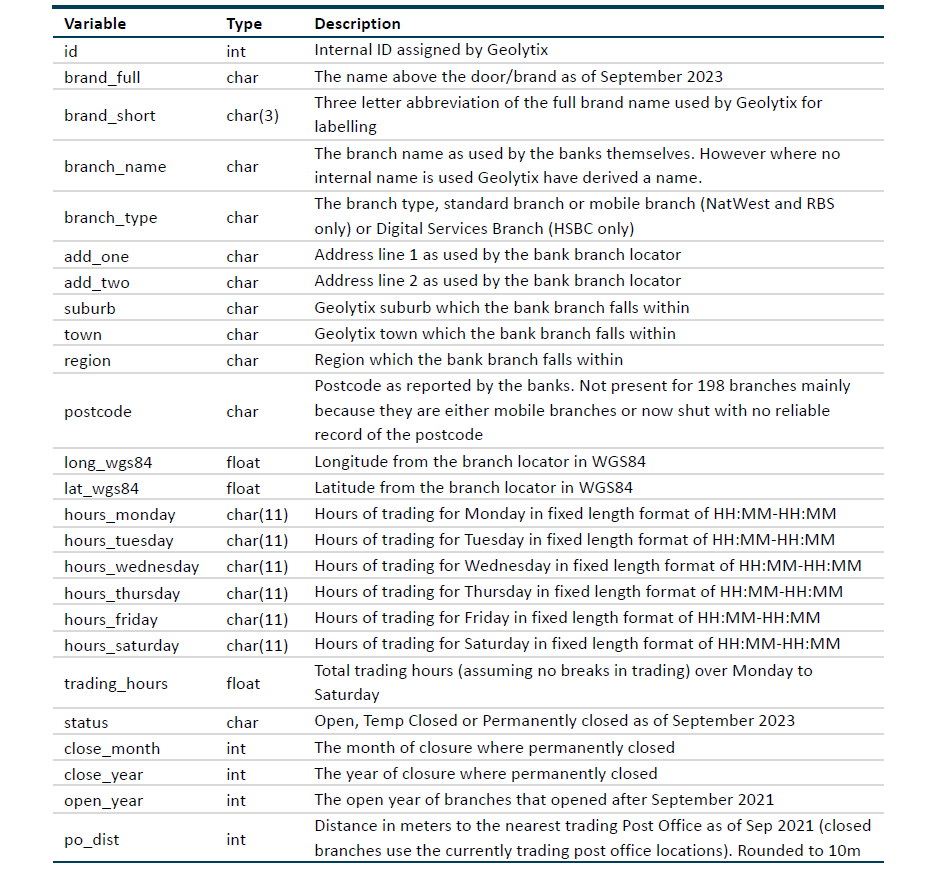

#### 5.3 | Data Exploration

In [380]:
#Shape of the Dataframe
print(bank_rp.shape)

(11160, 25)


The dataset has 11160 rows and 25 columns.

In [381]:
bank_rp.info(verbose=True) # info() function used to check the dtpye of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11160 non-null  int64  
 1   brand_full       11160 non-null  object 
 2   brand_short      11160 non-null  object 
 3   branch_name      10370 non-null  object 
 4   branch_type      11160 non-null  object 
 5   add_one          10346 non-null  object 
 6   add_two          3986 non-null   object 
 7   suburb           7977 non-null   object 
 8   town             11136 non-null  object 
 9   region           10639 non-null  object 
 10  postcode         10982 non-null  object 
 11  long_wgs84       11159 non-null  float64
 12  lat_wgs84        11159 non-null  float64
 13  hours_monday     5885 non-null   object 
 14  hours_tuesday    5794 non-null   object 
 15  hours_wednesday  5686 non-null   object 
 16  hours_thursday   5695 non-null   object 
 17  hours_friday

There are 8 numerical columns and 17 non-numerical columns in the dataset. 20 columns have null values/

In [382]:
# Calculating the Descriptive Statistics
bank_rp.describe(percentiles=[.05,0.95])

,id,long_wgs84,lat_wgs84,trading_hours,close_month,close_year,po_dist,open_year
count,"11,160.0000","11,159.0000","11,159.0000","6,268.0000","4,789.0000","5,397.0000","11,159.0000",974.0000
mean,"5,583.0669",-1.8826,52.9223,30.9269,6.8833,"2,019.3771",517.6233,"2,022.5082"
std,"3,225.9791",1.7348,1.8173,11.1935,2.8800,2.5321,"5,410.3740",0.5002
min,1.0000,-8.0919,49.1840,0.0833,1.0000,"2,015.0000",0.0000,"2,022.0000"
5%,558.9500,-4.9694,50.7901,1.0000,2.0000,"2,015.0000",29.0000,"2,022.0000"
50%,"5,580.5000",-1.7644,52.4805,34.0000,7.0000,"2,019.0000",155.0000,"2,023.0000"
95%,"10,607.0500",0.5233,56.4536,44.0000,11.0000,"2,023.0000",867.1000,"2,023.0000"
max,"11,227.0000",1.7544,60.1552,63.0000,12.0000,"2,024.0000","152,883.0000","2,023.0000"


#### 5.4 | Null Assessment and Data Imputation

**Counting Nulls by column**

In [383]:
bank_rp.isnull().sum(axis=0).sort_values(ascending=False)[:12] #Using the .isnull().sum() function to count the number of empty columns.

open_year          10186
hours_saturday      9128
add_two             7174
close_month         6371
close_year          5763
hours_wednesday     5474
hours_thursday      5465
hours_tuesday       5366
hours_friday        5322
hours_monday        5275
trading_hours       4892
suburb              3183
dtype: int64

**Dropping those columns which have highest number of NULL values and are not needed in our analysis.** 

**Additionally removing columns such as add_one, suburb, town, Lat, Long which will not be used in further analysis**

In [384]:
bank_rp.drop(columns=['id','brand_short','branch_name','add_one','add_two','suburb','town','long_wgs84','lat_wgs84','hours_monday','hours_tuesday','hours_wednesday','hours_thursday','hours_friday','hours_saturday','trading_hours','close_month','close_year','open_year'], inplace=True)

In [385]:
# updated dataset after removing not usable columns
bank_rp.info(verbose=True) # info() function used to check the dtpye of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand_full   11160 non-null  object 
 1   branch_type  11160 non-null  object 
 2   region       10639 non-null  object 
 3   postcode     10982 non-null  object 
 4   status       11160 non-null  object 
 5   po_dist      11159 non-null  float64
dtypes: float64(1), object(5)
memory usage: 523.3+ KB


**Imputing NaN in region column based using information from matching post code**

In [386]:
bank_rp[bank_rp.region.isna()]

,brand_full,branch_type,region,postcode,status,po_dist
0,TSB,Pop Up Branch,NaN,LN11 9BS,Open,"13,232.0000"
663,NatWest,Branch,NaN,JE4 8NH,Open,"148,786.0000"
1034,Lloyds,Branch,NaN,JE2 7TY,Open,"151,841.0000"
3084,NatWest,Banking Hub,NaN,BS27 3RB,Open,993.0000
4338,Barclays,Local Pod,NaN,NR25 6DN,Open,124.0000
...,...,...,...,...,...,...
11135,NatWest,Branch,NaN,JE3 8FX,Open,"150,942.0000"
11136,NatWest,Branch,NaN,NaN,Open,"123,543.0000"
11146,Virgin Money,Branch,NaN,PA75 6NU,Open,323.0000
11152,NatWest,Branch,NaN,JE4 8PJ,Open,"152,722.0000"


**There are 521 rows where region has NaN value.**

In [387]:
# Checking the unique value for region.
bank_rp.region.unique()

array([nan, 'Scotland', 'South East', 'Northern Ireland', 'London',
       'North West', 'East Midlands', 'Yorkshire and The Humber',
       'West Midlands', 'Wales', 'Eastern', 'South West', 'North East'],
      dtype=object)

In [388]:
# Removing the spaces between the postcode.
bank_rp['postcode'] = bank_rp['postcode'].replace('\s+', '', regex=True)

In [389]:
bank_rp['postcode']

0        LN119BS
1        IV408AF
2         ZE10AJ
3        IV458RQ
4        PA384BG
          ...   
11155     CR91PD
11156     G131LT
11157    PA427EL
11158    PA427DJ
11159     PR12AE
Name: postcode, Length: 11160, dtype: object

In [390]:
# temporary dataframe to store region
df2 = pd.DataFrame(bank_rp['region']) #storing region in different dataframe.

In [391]:
df2['postcode'] = bank_rp['postcode'] #Adding postcode column to df2.

In [392]:
df2.dropna(inplace = True)

In [393]:
df2 

,region,postcode
1,Scotland,IV408AF
2,Scotland,ZE10AJ
3,Scotland,IV458RQ
4,Scotland,PA384BG
5,Scotland,PH414QT
...,...,...
11154,South West,BS13EU
11155,London,CR91PD
11156,Scotland,G131LT
11157,Scotland,PA427EL


In [394]:
# Imputing region based on postcode information

for ind in bank_rp[bank_rp.region.isna() == True].index:
    val = bank_rp.postcode[ind]
    for i in df2.index:
        if df2.postcode[i] == val:
            bank_rp.region[ind] = df2.region[i]
            break


Here we have tried to fill all regions with NULL value which has the same postcode. So this way we can reduce the null values and fill it with appropriate value.

In [395]:
bank_rp[bank_rp.region.isna()]

,brand_full,branch_type,region,postcode,status,po_dist
0,TSB,Pop Up Branch,NaN,LN119BS,Open,"13,232.0000"
663,NatWest,Branch,NaN,JE48NH,Open,"148,786.0000"
1034,Lloyds,Branch,NaN,JE27TY,Open,"151,841.0000"
3084,NatWest,Banking Hub,NaN,BS273RB,Open,993.0000
4338,Barclays,Local Pod,NaN,NR256DN,Open,124.0000
...,...,...,...,...,...,...
11134,NatWest,Branch,NaN,GY57HA,Open,"116,973.0000"
11135,NatWest,Branch,NaN,JE38FX,Open,"150,942.0000"
11136,NatWest,Branch,NaN,NaN,Open,"123,543.0000"
11146,Virgin Money,Branch,NaN,PA756NU,Open,323.0000


**The NaN in region is now reduced to 477 rows. Droping 477 rows (<5%).**

In [396]:
# Drop the region column with na values.
bank_rp.drop(bank_rp[bank_rp.region.isna()].index.array, axis=0, inplace=True)

#### 5.5 | Data Analysis

Here we are trying to look at the Bank and the status and finding if there is any relation with the particular Bank which is getting closed to understand **If some banks, branch type or region are more likely to close branches than others?**

Now we are going to look at other columns which are useful in our analysis and if they contain any null values.

In [353]:
# Checking if there is any relation between types of branch and the status
bank_rp[(bank_rp.branch_type == 'Mobile Branch') & (bank_rp.status == 'Closed')]

,id,brand_full,branch_type,region,postcode,long_wgs84,lat_wgs84,status,close_month,close_year,po_dist
75,8071,Royal Bank of Scotland,Mobile Branch,Scotland,NaN,-3.8868,55.6374,Closed,NaN,"2,022.0000",93.0000
93,8085,Royal Bank of Scotland,Mobile Branch,Scotland,NaN,-2.2783,57.1548,Closed,NaN,"2,022.0000",95.0000
254,8065,Royal Bank of Scotland,Mobile Branch,Scotland,NaN,-4.7451,56.1963,Closed,NaN,"2,022.0000",358.0000
255,8076,Royal Bank of Scotland,Mobile Branch,Scotland,NaN,-4.9012,56.1710,Closed,NaN,"2,022.0000",97.0000
257,8080,Royal Bank of Scotland,Mobile Branch,Scotland,NaN,-4.1681,57.6883,Closed,NaN,"2,022.0000",54.0000
...,...,...,...,...,...,...,...,...,...,...,...
10423,7353,NatWest,Mobile Branch,Eastern,NaN,1.4140,52.7146,Closed,NaN,"2,022.0000",472.0000
10424,7346,NatWest,Mobile Branch,South West,NaN,-4.4665,50.4536,Closed,NaN,"2,022.0000",172.0000
10425,7345,NatWest,Mobile Branch,South East,NaN,-0.4550,50.9196,Closed,NaN,"2,022.0000",198.0000
10428,7363,NatWest,Mobile Branch,South East,NaN,-1.5057,50.6736,Closed,NaN,"2,022.0000","1,190.0000"


In [354]:
# Filter the DataFrame to include only closed branches
closed_branches = bank_rp[bank_rp['status'] == 'Closed']

# Calculate the sum of closed branches
sum_closed_branches = closed_branches['id'].count()

print("Sum of closed branches:", sum_closed_branches)


Sum of closed branches: 5254


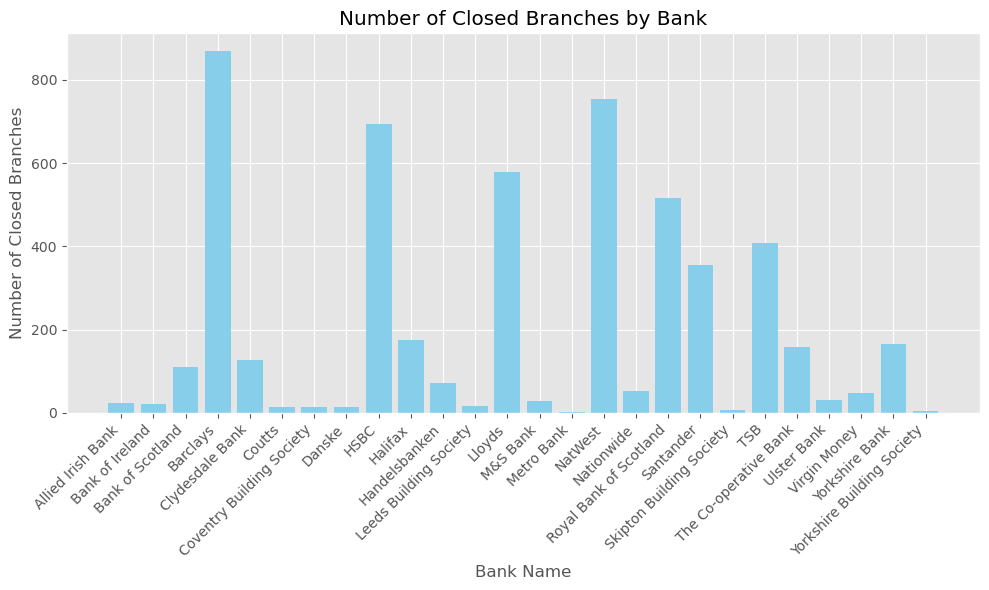

In [356]:
# Count the number of closed branches by bank
closed_branches_count = closed_branches.groupby('brand_full').size().reset_index(name='count')

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(closed_branches_count['brand_full'], closed_branches_count['count'], color='skyblue')
plt.xlabel('Bank Name')
plt.ylabel('Number of Closed Branches')
plt.title('Number of Closed Branches by Bank')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('CLOSED_Branches_Bank.png')
plt.show()

**Observations**
* The Bar-graph above show us clearly which branches are getting closed recently.
* The top three Branches are Barclays, NatWest and HSBC.
* However, we can also see many small branches are also getting closed so its not just big branches.

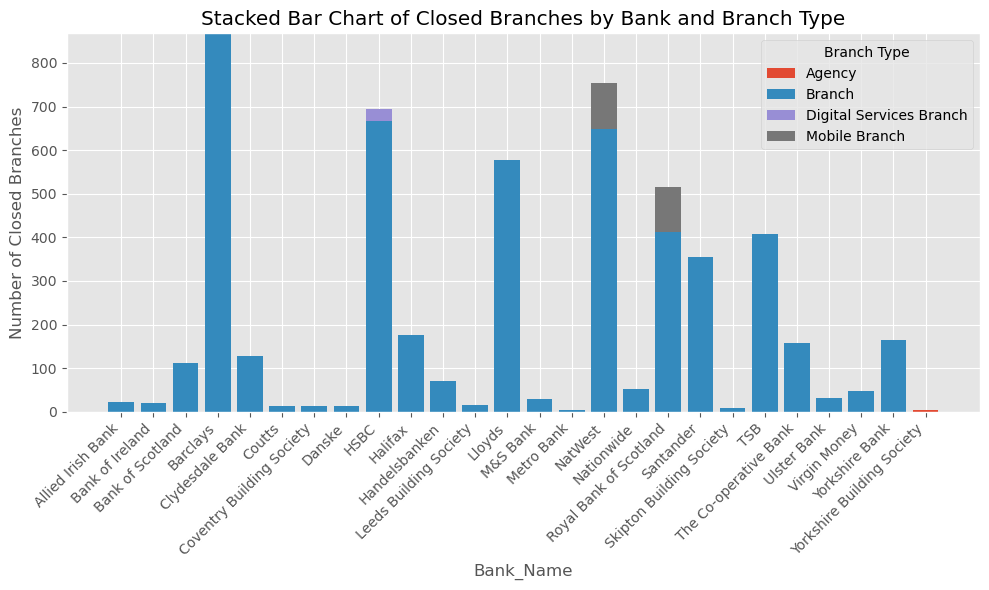

In [358]:
# Count the number of closed branches in each region and branch type
closed_branches_count = closed_branches.groupby(['brand_full', 'branch_type']).size().unstack(fill_value=0)

# Create a stacked bar graph
plt.figure(figsize=(10, 6))

for i, branch_type in enumerate(closed_branches_count.columns):
    plt.bar(closed_branches_count.index, closed_branches_count[branch_type], bottom=closed_branches_count.iloc[:, :i].sum(axis=1), label=branch_type)

plt.xlabel('Bank_Name')
plt.ylabel('Number of Closed Branches')
plt.title('Stacked Bar Chart of Closed Branches by Bank and Branch Type')
plt.legend(title='Branch Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Closed_Banks_Branch_Type.png')
plt.show()

**Observations**

* When we make a Stacked Bar Chart to see what type of branches are closed. So, there are four types of branches- Agency, Branch, Digital Services Branch and Mobile Branch. Mostly Main Branch are closed so which shows another pattern that its not necessary that only mobile branch are getting closed.

In [359]:
bank_rp[(bank_rp.branch_type == 'Branch') & (bank_rp.status == 'Closed')]

,id,brand_full,branch_type,region,postcode,long_wgs84,lat_wgs84,status,close_month,close_year,po_dist
15,7902,Royal Bank of Scotland,Branch,South East,PO160LH,-1.1752,50.8520,Closed,8.0000,"2,018.0000",309.0000
45,10388,Royal Bank of Scotland,Branch,South East,MK93GB,-0.7571,52.0409,Closed,10.0000,"2,022.0000",641.0000
56,10389,Royal Bank of Scotland,Branch,North West,PR12AE,-2.7022,53.7581,Closed,10.0000,"2,022.0000",156.0000
57,10385,Royal Bank of Scotland,Branch,Yorkshire and The Humber,S11HF,-1.4643,53.3815,Closed,10.0000,"2,022.0000",253.0000
78,673,Barclays,Branch,East Midlands,DN226DQ,-0.9432,53.3231,Closed,8.0000,"2,021.0000",254.0000
...,...,...,...,...,...,...,...,...,...,...,...
10627,4802,Lloyds,Branch,South East,OX183AG,-1.5953,51.7600,Closed,9.0000,"2,017.0000",212.0000
10628,3019,HSBC,Branch,South West,BA99JW,-2.4098,51.0568,Closed,1.0000,"2,016.0000",158.0000
10635,6814,NatWest,Branch,Eastern,PE275AG,-0.0736,52.3237,Closed,6.0000,"2,018.0000",28.0000
10637,9451,TSB,Branch,Eastern,PE261HG,-0.1065,52.4491,Closed,3.0000,"2,021.0000",151.0000


So 5017 banks comes under closed branch which has the type Branch.

**For one hot encoding we will select columns to keep in our analysis and start the machine learning modelling.**

In [360]:
columns_to_keep = ['brand_full', 'branch_type', 'region', 'status', 'po_dist']

In [361]:
final_bank_rp = bank_rp[columns_to_keep]

In [362]:
final_bank_rp

,brand_full,branch_type,region,status,po_dist
0,TSB,Pop Up Branch,NaN,Open,"13,232.0000"
1,Royal Bank of Scotland,Mobile Branch,Scotland,Open,151.0000
2,Royal Bank of Scotland,Branch,Scotland,Open,129.0000
3,Royal Bank of Scotland,Mobile Branch,Scotland,Open,137.0000
4,Royal Bank of Scotland,Mobile Branch,Scotland,Open,"3,306.0000"
...,...,...,...,...,...
11155,NatWest,Branch,London,Open,55.0000
11156,Nationwide,Branch,Scotland,Closed,78.0000
11157,Royal Bank of Scotland,Mobile Branch,Scotland,Open,337.0000
11158,Royal Bank of Scotland,Mobile Branch,Scotland,Open,212.0000


In [67]:
# Drop the region column with na values.
final_bank_rp.drop(final_bank_rp[final_bank_rp.region.isna()].index.array, axis=0, inplace=True)

In [68]:
final_bank_rp

,brand_full,branch_type,region,status,po_dist
1,Royal Bank of Scotland,Mobile Branch,Scotland,Open,151.0000
2,Royal Bank of Scotland,Branch,Scotland,Open,129.0000
3,Royal Bank of Scotland,Mobile Branch,Scotland,Open,137.0000
4,Royal Bank of Scotland,Mobile Branch,Scotland,Open,"3,306.0000"
5,Royal Bank of Scotland,Mobile Branch,Scotland,Open,59.0000
...,...,...,...,...,...
11155,NatWest,Branch,London,Open,55.0000
11156,Nationwide,Branch,Scotland,Closed,78.0000
11157,Royal Bank of Scotland,Mobile Branch,Scotland,Open,337.0000
11158,Royal Bank of Scotland,Mobile Branch,Scotland,Open,212.0000


In [69]:
final_bank_rp[final_bank_rp.po_dist.isna()]

,brand_full,branch_type,region,status,po_dist
1132,Ulster Bank,Branch,Northern Ireland,Closed,NaN


In [70]:
# Drop the po_dist row with na values.
final_bank_rp.drop(final_bank_rp[final_bank_rp.po_dist.isna()].index.array, axis=0, inplace=True)

In [71]:
# In status column we have three values which we should modify - closed/open/closing
final_bank_rp.status

1          Open
2          Open
3          Open
4          Open
5          Open
          ...  
11155      Open
11156    Closed
11157      Open
11158      Open
11159      Open
Name: status, Length: 10682, dtype: object

In [72]:
# Replace 'closing' with 'closed' in the 'status' column
final_bank_rp['status'] = final_bank_rp['status'].replace('Closing', 'Closed')

In [73]:
final_bank_rp['status'].unique()

array(['Open', 'Closed'], dtype=object)

In [74]:
final_bank_rp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 1 to 11159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand_full   10682 non-null  object 
 1   branch_type  10682 non-null  object 
 2   region       10682 non-null  object 
 3   status       10682 non-null  object 
 4   po_dist      10682 non-null  float64
dtypes: float64(1), object(4)
memory usage: 500.7+ KB


**Creating a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly showing percentage distribution in the pie-chart.**

In [75]:
#function to create piecharts for all categorical columns
def pieplots(data):
    col_names = data.columns[pd.Series(data.columns).apply(lambda x : final_bank_rp[x].dtype == 'object')]
    for col in col_names:
        print('Pie of column',col)
        temp_data = data[col].value_counts()
        print(temp_data)
        plt.pie(temp_data, labels=temp_data.index, autopct='%.1f%%');
        plt.show()

Pie of column brand_full
brand_full
NatWest                           1469
Barclays                          1333
Lloyds                            1188
HSBC                              1028
Royal Bank of Scotland             914
Santander                          798
Halifax                            663
Nationwide                         657
TSB                                624
Bank of Scotland                   269
Yorkshire Building Society         231
Handelsbanken                      228
The Co-operative Bank              208
Virgin Money                       175
Yorkshire Bank                     165
Clydesdale Bank                    127
Skipton Building Society            99
Metro Bank                          79
Coventry Building Society           78
Leeds Building Society              66
Ulster Bank                         65
Allied Irish Bank                   45
Danske                              41
West Bromwich Building Society      37
Bank of Ireland             

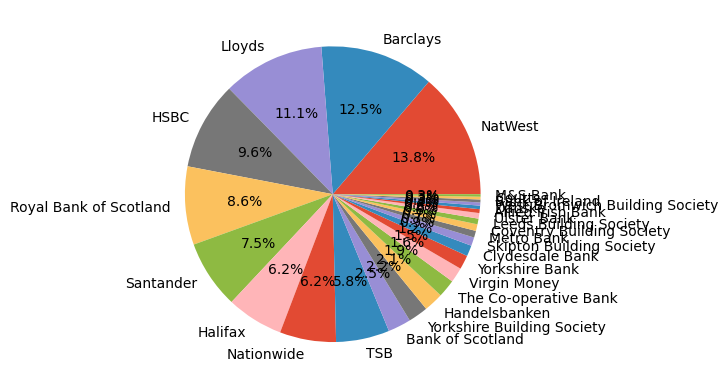

Pie of column branch_type
branch_type
Branch                     9732
Mobile Branch               731
Agency                      112
Digital Services Branch      76
Local Pod                    16
Banking Hub                   9
Pop Up Branch                 6
Name: count, dtype: int64


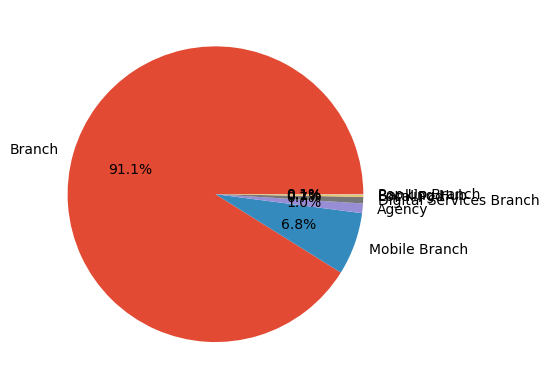

Pie of column region
region
Scotland                    1468
South East                  1434
London                      1275
North West                  1101
South West                  1026
Eastern                      848
Yorkshire and The Humber     838
West Midlands                830
Wales                        653
East Midlands                613
North East                   354
Northern Ireland             242
Name: count, dtype: int64


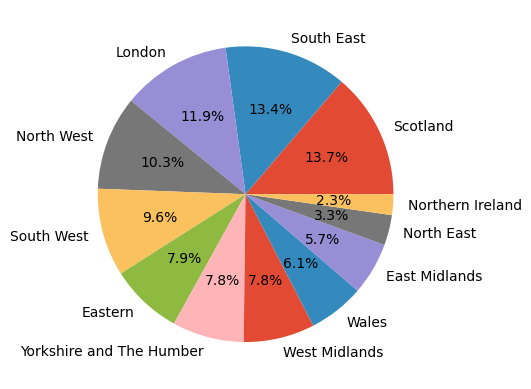

Pie of column status
status
Closed    5411
Open      5271
Name: count, dtype: int64


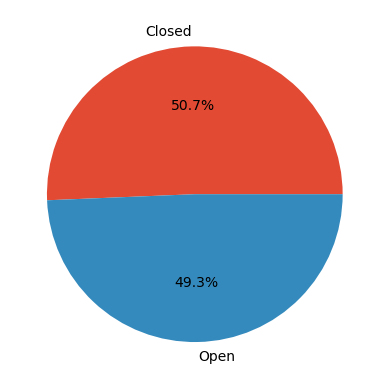

In [76]:
pieplots(final_bank_rp)   #calling function pieplots for creating pie charts of all categorical variables

**Observations**

* We already checked for the banks which are more in number like Natwest, Barclays, Llyods and HSBC.
* We have 91.11 % of main branch and 6.84 mobile branch.
* Regions having high branch is Scotland with 13.74%, South East 13.42% and London 11.94%.
* There are 50.66% of closed branches and 49.34% open branches.

### Converting categorical variables

In `bank_rp`, there are two data types: categorical (aka `object`), and numerical (including `int64` and `float64`).

First, we need to convert categorical variables into dummy/indicator variables, using `One-Hot Encoding`and 'Label Encoding'
For the status  **Label encoding** is done as it has only two values open and closed and for the other three columns brand_full, branch_type, region we will do 'One-Hot Encoding`

One note, the reason for doing one-hot encoding is that sklearn decision trees don't handle categorical data.

In [77]:
print(final_bank_rp['brand_full'].unique())

['Royal Bank of Scotland' 'Barclays' 'NatWest' 'Danske' 'Virgin Money'
 'Metro Bank' 'Coutts' 'The Co-operative Bank'
 'Yorkshire Building Society' 'Ulster Bank' 'Handelsbanken'
 'Skipton Building Society' 'Nationwide' 'Coventry Building Society'
 'Leeds Building Society' 'Bank of Scotland' 'TSB' 'Lloyds' 'Halifax'
 'Santander' 'HSBC' 'Bank of Ireland' 'Yorkshire Bank' 'Clydesdale Bank'
 'Allied Irish Bank' 'West Bromwich Building Society' 'M&S Bank']


In [78]:
print(final_bank_rp['branch_type'].unique())
print(final_bank_rp['region'].unique())

['Mobile Branch' 'Branch' 'Agency' 'Digital Services Branch'
 'Pop Up Branch' 'Local Pod' 'Banking Hub']
['Scotland' 'South East' 'Northern Ireland' 'London' 'North West'
 'East Midlands' 'Yorkshire and The Humber' 'West Midlands' 'Wales'
 'Eastern' 'South West' 'North East']


**One-Hot Encoding**

In [79]:
final_bank_rp_encoded = pd.get_dummies(final_bank_rp, columns=['brand_full', 'branch_type', 'region'], drop_first =True, dtype = int)
# Use dtype = int because one-hot encoding was giving boolean value.

In [80]:
final_bank_rp_encoded.head()

,status,po_dist,brand_full_Bank of Ireland,brand_full_Bank of Scotland,brand_full_Barclays,brand_full_Clydesdale Bank,brand_full_Coutts,brand_full_Coventry Building Society,brand_full_Danske,brand_full_HSBC,...,region_London,region_North East,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Wales,region_West Midlands,region_Yorkshire and The Humber
1,Open,151.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Open,129.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Open,137.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Open,"3,306.0000",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,Open,59.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
final_bank_rp_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 1 to 11159
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   status                                     10682 non-null  object 
 1   po_dist                                    10682 non-null  float64
 2   brand_full_Bank of Ireland                 10682 non-null  int64  
 3   brand_full_Bank of Scotland                10682 non-null  int64  
 4   brand_full_Barclays                        10682 non-null  int64  
 5   brand_full_Clydesdale Bank                 10682 non-null  int64  
 6   brand_full_Coutts                          10682 non-null  int64  
 7   brand_full_Coventry Building Society       10682 non-null  int64  
 8   brand_full_Danske                          10682 non-null  int64  
 9   brand_full_HSBC                            10682 non-null  int64  
 10  brand_full_Halifax         

In [82]:
print(final_bank_rp_encoded['po_dist'].dtype)

float64


**Here we want to check if there are any outliers or not in po_dist because that is our numerical column.**

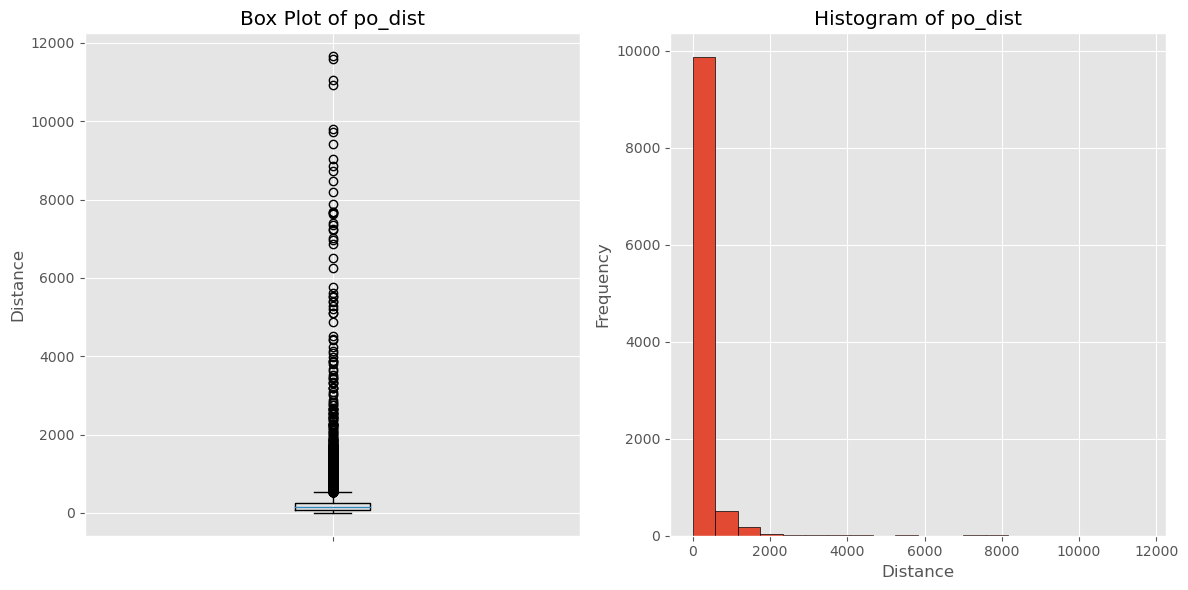

In [83]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot a box plot
axs[0].boxplot(final_bank_rp_encoded['po_dist'])
axs[0].set_title('Box Plot of po_dist')
axs[0].set_ylabel('Distance')
axs[0].set_xticklabels([''])

# Plot a histogram
axs[1].hist(final_bank_rp_encoded['po_dist'], bins=20, edgecolor='black')
axs[1].set_title('Histogram of po_dist')
axs[1].set_xlabel('Distance')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [84]:
final_bank_rp_encoded.po_dist.describe()

count                                10,682.0000
mean                                    264.9850
std                                     551.6122
min                                       0.0000
25%                                      85.0000
50%                                     152.0000
75%                                     261.0000
max                                  11,661.0000
Name: po_dist, dtype: float64

**Observations**

1. The box-plot and histogram shows a number of outliers roughly with values above 75th percentile. These outliers may introduce bias in the data. Therefore these outliers have to be removed or treated.
   
2. As we are looking at branches which have been closed based on distance. Typically if a post-office is closer to the branch there is high chance for bank to decide to closed down the branch and offer transaction to customers through Post Office. Assuming that this is true removing these outliers may not impact the decision to close the branch based on distance from Post Office.

In [85]:
#Removing Outliers from po_dist column.

# Calculate Q1, Q3, and IQR
Q1 = final_bank_rp_encoded['po_dist'].quantile(0.25)
Q3 = final_bank_rp_encoded['po_dist'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
final_bank_rp_encoded = final_bank_rp_encoded[(final_bank_rp_encoded['po_dist'] >= lower_bound) & (final_bank_rp_encoded['po_dist'] <= upper_bound)]


In [86]:
final_bank_rp_encoded.po_dist.describe()

count                                 9,755.0000
mean                                    163.4019
std                                     110.6785
min                                       0.0000
25%                                      79.0000
50%                                     139.0000
75%                                     223.0000
max                                     525.0000
Name: po_dist, dtype: float64

**Standardizing the distance column**

In [87]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 'po_dist' column and transform it
final_bank_rp_encoded['po_dist'] = scaler.fit_transform(final_bank_rp_encoded[['po_dist']])

In [88]:
final_bank_rp_encoded.po_dist.describe()

count                                 9,755.0000
mean                                      0.0000
std                                       1.0001
min                                      -1.4764
25%                                      -0.7626
50%                                      -0.2205
75%                                       0.5385
max                                       3.2673
Name: po_dist, dtype: float64

In [89]:
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
final_bank_rp_encoded['status']= label_encoder.fit_transform(final_bank_rp_encoded['status'])

final_bank_rp_encoded['status'].unique()

array([1, 0])

In [90]:
final_bank_rp_encoded

,status,po_dist,brand_full_Bank of Ireland,brand_full_Bank of Scotland,brand_full_Barclays,brand_full_Clydesdale Bank,brand_full_Coutts,brand_full_Coventry Building Society,brand_full_Danske,brand_full_HSBC,...,region_London,region_North East,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Wales,region_West Midlands,region_Yorkshire and The Humber
1,1,-0.1121,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,-0.3108,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,-0.2386,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,-0.9433,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,-1.0066,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,1,-0.9795,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11156,0,-0.7717,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11157,1,1.5686,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11158,1,0.4391,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [280]:
# Checking Class Imbalance
final_bank_rp_encoded.status.value_counts()

status
0    4902
1    4853
Name: count, dtype: int64

The Classes in Target variable appears to be balanced, hence does not require further balancing.

<a id="ID_model"></a>
INDEX | [1.0 Intro](#ID_intr) | [2.0 Lit. Review](#ID_lit) | [3.0 Research Question](#ID_research) | [4.0 Methodology](#ID_method) | [5.0 Data Understanding and Exploration](#ID_data) | [6.0 Model Building and Improvement](#ID_model) | [7.0 Results and Discussion](#ID_result) | [8.0 Conclusion](#ID_conclusion) | [Bibliography](#ID_biblio)

## 6.0 | Model Building and Improvement

**Splitting data into random train and test subsets**

By default, `train_test_split` will split the data according to a 75:25 split.
The split should be random in order to avoid selection bias. Here, we set random_state=100 to guarantee reproducibility.
Here we input two dataframes (X and Y) and will get four outputs (train_x, test_x, train_y, test_y).

In [191]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(final_bank_rp_encoded.drop(['status'], axis = 1), final_bank_rp_encoded.status, test_size = 0.25, random_state=random_state_split)

Double check the rows and columns of the outputs.

In [192]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(7316, 44)
(7316,)
(2439, 44)
(2439,)
True
True


**The Dependant variable (y) here is closed and open labeled as 0 and 1. Therefore *Decision Tree Classifier has been applied*.**

In [217]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state = 5)

# Train Decision Tree Classifer
clf = clf.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = clf.predict(test_x)

In [218]:
# Calculation of train and test accuracy
train_acc = accuracy_score(train_y,clf.predict(train_x))
test_acc = accuracy_score(test_y,y_pred)

print("Train Accuracy:",train_acc)
print("Test Accuracy:",test_acc)

Train Accuracy: 0.9543466375068343
Test Accuracy: 0.6383763837638377


Based on Train and Test accuracy, it appears that model is overfitting on training data and unable to generalize. 

Confusion Matrix


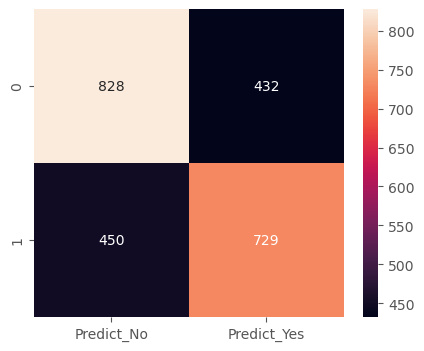

In [219]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(test_y, y_pred, labels=[0,1])
cm
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predict_No','Predict_Yes']])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True,fmt='d');

Based on the confusion matrix model is able to predict both classes equally well.

Model is predicting status 729 times (TP), 450 (FN) misclassifications and 828 (TN) and 432 (FP) misclassifications.

In [220]:
# function to calculate precision, recall and f1-score
def evaluation_metrices(y_predict,X_tr,y_tr,X_te,y_te):
    cm = confusion_matrix(y_te, y_predict)
    classification_report(y_te, y_predict)
    
    p = cm[1,1] / (cm[1,1] + cm[0,1])
    r = cm[1,1] / (cm[1,1] + cm[1,0])
    f = (2 * p * r) / (p + r)

    #print(confusion_matrix(y_te, y_predict))
    #print(classification_report(y_te, y_predict))
    
    return p,r,f

In [221]:
# Calling evaluation_metrices function 
precision, recall, fscore = evaluation_metrices(y_pred,train_x,train_y,test_x,test_y)

In [222]:
# A data frame to store Model results
model_results = pd.DataFrame(columns = ['Model Name','Train Accuracy','Test Accuracy','Precision','Recall','F-Score'])

In [223]:
# Storing model results 
model_results.loc[len(model_results.index)] = ["DecisionTreeClassifier", train_acc, test_acc, precision, recall, fscore]

In [224]:
model_results

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F-Score
0,DecisionTreeClassifier,0.9543,0.6384,0.6279,0.6183,0.6231


We got a classification rate of 63.38%, which is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree algorithm.

**Tuning hyperparameters of the ML model**

In machine learning, hyperparameters are the model settings predefined by the user, e.g. maximum height of the decision tree.

The best hyperparametrs are subjective and differs for every dataset.

**Optimizing Decision Tree Performance parameters**

**criterion** : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure.
Supported criteria are **“gini”** for the Gini index and **“entropy”** for the information gain.

**splitter** : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are **“best”** to choose the best split and **“random”** to choose the best random split.

**max_depth** : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In [225]:
# RandomizedSearchCV model is used in this case, it implements a “fit” and a “score” method.
#The parameters of the estimator used to apply these methods are optimized by cross-validated
from sklearn.model_selection import RandomizedSearchCV

In [226]:
from scipy.stats import randint #The randint() method returns an integer number selected element from the specified range.
from scipy.stats import uniform

In [227]:
# Create Decision Tree classifer object
clf_tune = DecisionTreeClassifier(random_state = 5)

In [228]:
#parameters for hyperparameter initialisation
params = {
            'criterion': ['gini', 'entropy', 'log_loss']
            , 'splitter': ['best','random']
            , 'max_depth': randint(2,50)
            , 'max_features': ['auto','sqrt','log2',None]
            , 'class_weight': ['balanced',None]
        }

In [229]:
#creating instance for RandomizedSearchCV
random_search = RandomizedSearchCV(clf_tune, param_distributions=params, n_iter=50, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=5)

In [230]:
random_search.fit(train_x,train_y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END class_weight=None, criterion=log_loss, max_depth=49, max_features=sqrt, splitter=best;, score=0.611 total time=   0.1s
[CV 3/10] END class_weight=None, criterion=log_loss, max_depth=49, max_features=sqrt, splitter=best;, score=0.616 total time=   0.1s
[CV 5/10] END class_weight=None, criterion=log_loss, max_depth=49, max_features=sqrt, splitter=best;, score=0.598 total time=   0.1s
[CV 4/10] END class_weight=None, criterion=log_loss, max_depth=49, max_features=sqrt, splitter=best;, score=0.624 total time=   0.1s
[CV 2/10] END class_weight=None, criterion=log_loss, max_depth=49, max_features=sqrt, splitter=best;, score=0.607 total time=   0.1s
[CV 9/10] END class_weight=None, criterion=log_loss, max_depth=49, max_features=sqrt, splitter=best;, score=0.620 total time=   0.1s
[CV 1/10] END class_weight=balanced, criterion=gini, max_depth=11, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/10

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f66cec44c50>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'splitter': ['best', 'random']},
                   random_state=5, scoring='accuracy', verbose=3)

In [231]:
#predicted best parameter
random_search.best_params_

{'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 17,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [232]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=17, max_features='sqrt',
                       random_state=5)

In [233]:
clf_tune = random_search.best_estimator_

# Train Decision Tree Classifer
clf_tune = clf_tune.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = clf_tune.predict(test_x)

In [234]:
# Calculation of train and test accuracy
train_acc = accuracy_score(train_y,clf_tune.predict(train_x))
test_acc = accuracy_score(test_y,y_pred)

print("Train Accuracy:",train_acc)
print("Test Accuracy:",test_acc)

Train Accuracy: 0.6999726626571897
Test Accuracy: 0.6650266502665027


With hyperparameter tuning, the problem of overfitting is solved but the overall accuracy has not improved.

Confusion Matrix


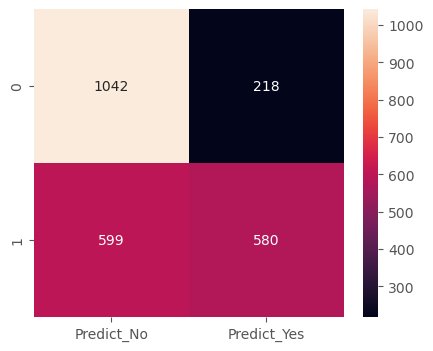

In [235]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(test_y, y_pred, labels=[0,1])
cm
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predict_No','Predict_Yes']])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True,fmt='d');

The Model is able to predict class 0 better than class 1.

Model is predicting status 580 times (TP), 599 (FN) misclassifications and 1042 (TN) and 218 (FP) misclassifications.

In [236]:
# Calling evaluation_metrices function 
precision, recall, fscore = evaluation_metrices(y_pred,train_x,train_y,test_x,test_y)

In [279]:
# Storing model results 
model_results.loc[len(model_results.index)] = ["DecisionTreeClassifier - Hyperparameter tuning", train_acc, test_acc, precision, recall, fscore]

In [238]:
model_results

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F-Score
0,DecisionTreeClassifier,0.9543,0.6384,0.6279,0.6183,0.6231
1,DecisionTreeClassifier - After Hypertuning,0.7000,0.6650,0.7268,0.4919,0.5867


Here we can see that after tuning the Classification Accuracy has increased to 66.50 which is an improved rate than the previous model.
The overfitting problem is also solved which means that the model is able to generalize and predict better on unseen data. Precision has improved but due to reduction of false positives recall has deteriotated due to the overall denominator value.

**To Check more Model we will use Random Forest Classifier**

In [239]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=5)

# fit the model
rfc.fit(train_x,train_y)

# Predict the Test set results
y_pred = rfc.predict(test_x)

In [240]:
# Calculation of train and test accuracy
train_acc = accuracy_score(train_y,rfc.predict(train_x))
test_acc = accuracy_score(test_y,y_pred)

print("Train Accuracy:",train_acc)
print("Test Accuracy:",test_acc)

Train Accuracy: 0.9542099507927829
Test Accuracy: 0.6412464124641246


Confusion Matrix


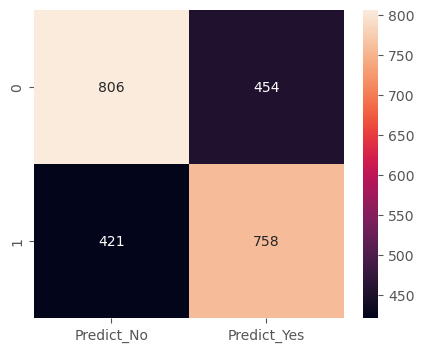

In [241]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(test_y, y_pred, labels=[0,1])
cm
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predict_No','Predict_Yes']])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True,fmt='d');

Model is predicting status 758 times (TP), 421 (FN) misclassifications and 806 (TN) and 454 (FP) misclassifications.

In [242]:
# Calling evaluation_metrices function 
precision, recall, fscore = evaluation_metrices(y_pred,train_x,train_y,test_x,test_y)

In [243]:
# Storing model results 
model_results.loc[len(model_results.index)] = ["RandomForestClassifier", train_acc, test_acc, precision, recall, fscore]

In [244]:
model_results

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F-Score
0,DecisionTreeClassifier,0.9543,0.6384,0.6279,0.6183,0.6231
1,DecisionTreeClassifier - After Hypertuning,0.7000,0.6650,0.7268,0.4919,0.5867
2,RandomForestClassifier,0.9542,0.6412,0.6254,0.6429,0.6340


For tuning RF the parameters added here are

In [245]:
# Create Random Forest Classifer object
rfc_tune = RandomForestClassifier(random_state=5)

In [246]:
#parameters for hyperparameter initialisation
params = {
            'n_estimators': randint(10,200)
            , 'criterion': ['gini','entropy','log_loss']
            , 'max_depth': randint(2,30)
            , 'max_features': ['sqrt','log2',None]
            , 'bootstrap': [True,False]
            , 'class_weight': ['balanced','balanced_subsample',None]
            , 'max_samples': uniform(0.0,1.0)
        }

In [247]:
#creating instance for RandomizedSearchCV
random_search = RandomizedSearchCV(rfc_tune, param_distributions=params, n_iter=50, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=5)

In [248]:
random_search.fit(train_x,train_y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 3/10] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=8, max_features=None, max_samples=0.9186109079379216, n_estimators=18;, score=nan total time=   0.0s
[CV 1/10] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=8, max_features=None, max_samples=0.9186109079379216, n_estimators=18;, score=nan total time=   0.0s
[CV 4/10] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=8, max_features=None, max_samples=0.9186109079379216, n_estimators=18;, score=nan total time=   0.0s
[CV 9/10] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=8, max_features=None, max_samples=0.9186109079379216, n_estimators=18;, score=nan total time=   0.0s
[CV 2/10] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=8, max_features=None, max_samples=0.9186109079379216, n_estimators=18;, score=nan total time=   0.0s
[CV 5/10] END bootstrap=False, class_

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f66ce6d6010>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f67318dca50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f66ce85a610>},
                   random_state=5, scoring='accuracy', verbose=3)

In [249]:
#predicted best parameter
random_search.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'max_samples': 0.13436372785235862,
 'n_estimators': 84}

In [250]:
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       max_samples=0.13436372785235862, n_estimators=84,
                       random_state=5)

In [251]:
rfc_tune = random_search.best_estimator_

# Train Decision Tree Classifer
rfc_tune = rfc_tune.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = rfc_tune.predict(test_x)

In [252]:
# Calculation of train and test accuracy
train_acc = accuracy_score(train_y,rfc_tune.predict(train_x))
test_acc = accuracy_score(test_y,y_pred)

print("Train Accuracy:",train_acc)
print("Test Accuracy:",test_acc)

Train Accuracy: 0.7040732640787315
Test Accuracy: 0.6769167691676917


Confusion Matrix


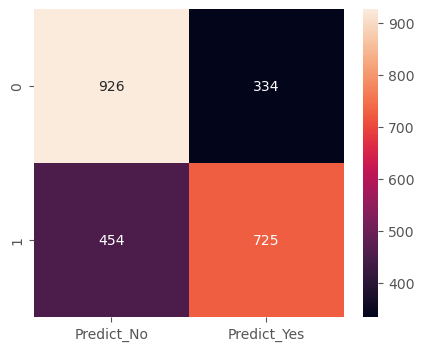

In [253]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(test_y, y_pred, labels=[0,1])
cm
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predict_No','Predict_Yes']])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True,fmt='d');

Model is predicting status 725 times (TP), 454 (FN) misclassifications and 926(TN) and 334 (FP) misclassifications.

In [254]:
# Calling evaluation_metrices function 
precision, recall, fscore = evaluation_metrices(y_pred,train_x,train_y,test_x,test_y)

In [255]:
# Storing model results 
model_results.loc[len(model_results.index)] = ["RandomForestClassifierr - Hyperparameter tuning", train_acc, test_acc, precision, recall, fscore]

In [256]:
model_results

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F-Score
0,DecisionTreeClassifier,0.9543,0.6384,0.6279,0.6183,0.6231
1,DecisionTreeClassifier - After Hypertuning,0.7000,0.6650,0.7268,0.4919,0.5867
2,RandomForestClassifier,0.9542,0.6412,0.6254,0.6429,0.6340
3,RandomForestClassifierr - Hyperparameter tuning,0.7041,0.6769,0.6846,0.6149,0.6479


So, for Random forest after tuning and taking the best hyperparametrs we get an improved accuracy score to **67.69.**

 **Train a model using XGBoost.**

Now we are training the Model using XGBoost. It is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

In [258]:
# import XGBClassifier
from xgboost import XGBClassifier

# instantiate the classifier
xgb1 = XGBClassifier(nthread = -1, random_state=5)

# fit the model
xgb1.fit(train_x, train_y)

# Predict the Test set results
y_pred = xgb1.predict(test_x)

In [259]:
# Calculation of train and test accuracy
train_acc = accuracy_score(train_y,xgb1.predict(train_x))
test_acc = accuracy_score(test_y,y_pred)

print("Train Accuracy:",train_acc)
print("Test Accuracy:",test_acc)

Train Accuracy: 0.7707763805358119
Test Accuracy: 0.6777367773677737


Confusion Matrix


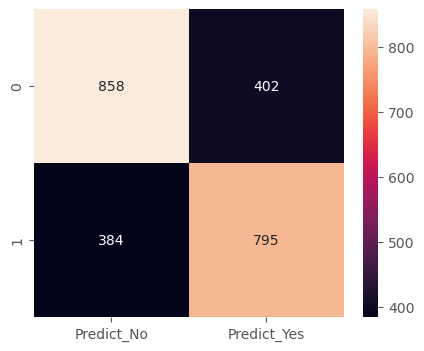

In [260]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(test_y, y_pred, labels=[0,1])
cm
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predict_No','Predict_Yes']])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True,fmt='d');

Model is predicting status 795 times (TP), 384 (FN) misclassifications and 858 (TN) and 402 (FP) misclassifications.

In [261]:
# Calling evaluation_metrices function 
precision, recall, fscore = evaluation_metrices(y_pred,train_x,train_y,test_x,test_y)

In [262]:
# Storing model results 
model_results.loc[len(model_results.index)] = ["XGBClassifier", train_acc, test_acc, precision, recall, fscore]

In [263]:
model_results

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F-Score
0,DecisionTreeClassifier,0.9543,0.6384,0.6279,0.6183,0.6231
1,DecisionTreeClassifier - After Hypertuning,0.7000,0.6650,0.7268,0.4919,0.5867
2,RandomForestClassifier,0.9542,0.6412,0.6254,0.6429,0.6340
3,RandomForestClassifierr - Hyperparameter tuning,0.7041,0.6769,0.6846,0.6149,0.6479
4,XGBClassifier,0.7708,0.6777,0.6642,0.6743,0.6692


So, we can see here that by using XGBoost the test accuracy has improved to 67.77%. To improve the predictions further we can tune it using RandomizedSearchCV.

In [266]:
# Create Decision Tree classifer object
xgb1_tune = XGBClassifier(nthread = -1, random_state=5)

In [267]:
#parameters for hyperparameter initialisation
params = {
            'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
            'max_depth' : randint(2,50),   #[3,4,5,6,7,8,9,10,11,12,13,14,15],
            'min_child_weight' : randint(1,10), #[1,3,5,7],
            'gamma' : [0.0,0.1,0.2,0.3,0.4],
            'colsample_bytree' : [0.3,0.4,0.5,0.6,0.7]
        }

In [268]:
#creating instance for RandomizedSearchCV
random_search = RandomizedSearchCV(xgb1_tune, param_distributions=params, n_iter=50, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=5)

In [269]:
random_search.fit(train_x,train_y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureW

[CV 3/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.691 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.673 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.667 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.669 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 2/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.663 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.694 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.700 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.673 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 9/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.685 total time=   0.5s
[CV 10/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.681 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=9, min_child_weight=2;, score=0.687 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=9, min_child_weight=2;, score=0.668 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 3/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=9, min_child_weight=2;, score=0.684 total time=   0.4s
[CV 5/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=9, min_child_weight=2;, score=0.663 total time=   0.4s
[CV 4/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=9, min_child_weight=2;, score=0.706 total time=   0.5s
[CV 6/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=9, min_child_weight=2;, score=0.664 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-pac

[CV 8/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=9, min_child_weight=2;, score=0.707 total time=   0.4s
[CV 7/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=9, min_child_weight=2;, score=0.666 total time=   0.4s
[CV 10/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=9, min_child_weight=2;, score=0.695 total time=   0.4s
[CV 9/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=9, min_child_weight=2;, score=0.684 total time=   0.4s
[CV 1/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=2;, score=0.660 total time=   0.4s
[CV 2/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=2;, score=0.669 total time=   0.3s
[CV 4/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=2;, score=0.697 total time=   0.3s
[CV 3/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_d

/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: Future

[CV 5/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=2;, score=0.669 total time=   0.4s
[CV 7/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=2;, score=0.658 total time=   0.4s
[CV 8/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=2;, score=0.694 total time=   0.4s
[CV 6/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=2;, score=0.691 total time=   0.4s
[CV 9/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=2;, score=0.694 total time=   0.4s
[CV 10/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=2;, score=0.653 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 2/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=11, min_child_weight=2;, score=0.663 total time=   0.5s
[CV 1/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=11, min_child_weight=2;, score=0.676 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 4/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=11, min_child_weight=2;, score=0.716 total time=   0.5s
[CV 5/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=11, min_child_weight=2;, score=0.663 total time=   0.6s
[CV 3/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=11, min_child_weight=2;, score=0.690 total time=   0.6s
[CV 6/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=11, min_child_weight=2;, score=0.676 total time=   0.6s
[CV 7/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=11, min_child_weight=2;, score=0.659 total time=   0.5s
[CV 8/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=11, min_child_weight=2;, score=0.700 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 9/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=11, min_child_weight=2;, score=0.691 total time=   0.5s
[CV 1/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.684 total time=   0.3s
[CV 10/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=11, min_child_weight=2;, score=0.670 total time=   0.5s
[CV 2/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.676 total time=   0.3s
[CV 4/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.714 total time=   0.3s
[CV 3/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.705 total time=   0.3s
[CV 5/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.672 total time=   0.3s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 6/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.669 total time=   0.3s
[CV 7/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.677 total time=   0.3s
[CV 8/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.706 total time=   0.3s
[CV 9/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.696 total time=   0.3s
[CV 10/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.687 total time=   0.3s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=3;, score=0.663 total time=   0.5s
[CV 2/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=3;, score=0.653 total time=   0.5s
[CV 3/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=3;, score=0.672 total time=   0.5s
[CV 4/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=3;, score=0.697 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 5/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=3;, score=0.665 total time=   0.5s
[CV 6/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=3;, score=0.654 total time=   0.5s
[CV 8/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=3;, score=0.691 total time=   0.5s
[CV 7/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=3;, score=0.642 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 9/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=3;, score=0.670 total time=   0.5s
[CV 2/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=21, min_child_weight=3;, score=0.643 total time=   0.5s
[CV 1/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=21, min_child_weight=3;, score=0.661 total time=   0.5s
[CV 10/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=3;, score=0.669 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 3/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=21, min_child_weight=3;, score=0.668 total time=   0.5s
[CV 4/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=21, min_child_weight=3;, score=0.680 total time=   0.5s
[CV 6/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=21, min_child_weight=3;, score=0.660 total time=   0.5s
[CV 5/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=21, min_child_weight=3;, score=0.663 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 7/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=21, min_child_weight=3;, score=0.646 total time=   0.5s
[CV 9/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=21, min_child_weight=3;, score=0.657 total time=   0.5s
[CV 1/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=47, min_child_weight=4;, score=0.661 total time=   0.4s
[CV 8/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=21, min_child_weight=3;, score=0.685 total time=   0.5s
[CV 10/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=21, min_child_weight=3;, score=0.663 total time=   0.5s
[CV 2/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=47, min_child_weight=4;, score=0.660 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/li

[CV 3/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=47, min_child_weight=4;, score=0.682 total time=   0.4s
[CV 4/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=47, min_child_weight=4;, score=0.689 total time=   0.4s
[CV 5/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=47, min_child_weight=4;, score=0.680 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: Future

[CV 6/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=47, min_child_weight=4;, score=0.665 total time=   0.4s
[CV 8/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=47, min_child_weight=4;, score=0.689 total time=   0.4s
[CV 10/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=47, min_child_weight=4;, score=0.662 total time=   0.4s
[CV 7/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=47, min_child_weight=4;, score=0.642 total time=   0.4s[CV 9/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=47, min_child_weight=4;, score=0.698 total time=   0.4s



/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=29, min_child_weight=2;, score=0.658 total time=   0.6s
[CV 2/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=29, min_child_weight=2;, score=0.635 total time=   0.6s
[CV 3/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=29, min_child_weight=2;, score=0.660 total time=   0.6s
[CV 4/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=29, min_child_weight=2;, score=0.693 total time=   0.6s
[CV 6/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=29, min_child_weight=2;, score=0.667 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 7/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=29, min_child_weight=2;, score=0.631 total time=   0.6s
[CV 5/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=29, min_child_weight=2;, score=0.639 total time=   0.6s
[CV 8/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=29, min_child_weight=2;, score=0.680 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 9/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=29, min_child_weight=2;, score=0.669 total time=   0.6s
[CV 10/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=29, min_child_weight=2;, score=0.644 total time=   0.6s
[CV 1/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=33, min_child_weight=7;, score=0.649 total time=   0.7s
[CV 2/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=33, min_child_weight=7;, score=0.648 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWa

[CV 3/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=33, min_child_weight=7;, score=0.676 total time=   0.7s
[CV 5/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=33, min_child_weight=7;, score=0.683 total time=   0.6s
[CV 4/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=33, min_child_weight=7;, score=0.690 total time=   0.7s
[CV 6/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=33, min_child_weight=7;, score=0.668 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 7/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=33, min_child_weight=7;, score=0.633 total time=   0.6s
[CV 8/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=33, min_child_weight=7;, score=0.692 total time=   0.6s
[CV 4/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=26, min_child_weight=7;, score=0.693 total time=   0.4s
[CV 1/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=26, min_child_weight=7;, score=0.671 total time=   0.4s
[CV 9/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=33, min_child_weight=7;, score=0.689 total time=   0.6s
[CV 2/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=26, min_child_weight=7;, score=0.652 total time=   0.5s
[CV 10/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=33, min_child_weight=7;, score=0.659 total time=   0.6s
[CV 3/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_d

/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 5/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=26, min_child_weight=7;, score=0.672 total time=   0.3s
[CV 6/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=26, min_child_weight=7;, score=0.672 total time=   0.4s
[CV 7/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=26, min_child_weight=7;, score=0.635 total time=   0.4s
[CV 8/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=26, min_child_weight=7;, score=0.691 total time=   0.4s
[CV 9/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=26, min_child_weight=7;, score=0.687 total time=   0.4s
[CV 10/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=26, min_child_weight=7;, score=0.665 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=14, min_child_weight=6;, score=0.669 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=14, min_child_weight=6;, score=0.661 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 3/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=14, min_child_weight=6;, score=0.691 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=14, min_child_weight=6;, score=0.704 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=14, min_child_weight=6;, score=0.673 total time=   0.5s
[CV 6/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=14, min_child_weight=6;, score=0.669 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=14, min_child_weight=6;, score=0.662 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=14, min_child_weight=6;, score=0.699 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 9/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=14, min_child_weight=6;, score=0.692 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=14, min_child_weight=6;, score=0.672 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 4/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=18, min_child_weight=1;, score=0.682 total time=   0.7s
[CV 1/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=18, min_child_weight=1;, score=0.649 total time=   0.7s
[CV 2/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=18, min_child_weight=1;, score=0.653 total time=   0.7s
[CV 5/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=18, min_child_weight=1;, score=0.658 total time=   0.7s
[CV 6/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=18, min_child_weight=1;, score=0.686 total time=   0.7s
[CV 3/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=18, min_child_weight=1;, score=0.653 total time=   0.8s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 8/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=18, min_child_weight=1;, score=0.687 total time=   0.7s
[CV 7/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=18, min_child_weight=1;, score=0.648 total time=   0.7s
[CV 2/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=39, min_child_weight=6;, score=0.650 total time=   0.4s
[CV 1/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=39, min_child_weight=6;, score=0.669 total time=   0.4s
[CV 3/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=39, min_child_weight=6;, score=0.680 total time=   0.4s
[CV 4/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=39, min_child_weight=6;, score=0.676 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 9/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=18, min_child_weight=1;, score=0.650 total time=   0.6s
[CV 10/10] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=18, min_child_weight=1;, score=0.648 total time=   0.6s[CV 5/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=39, min_child_weight=6;, score=0.680 total time=   0.4s

[CV 6/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=39, min_child_weight=6;, score=0.675 total time=   0.4s
[CV 7/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=39, min_child_weight=6;, score=0.639 total time=   0.4s
[CV 9/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=39, min_child_weight=6;, score=0.685 total time=   0.4s
[CV 8/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=39, min_child_weight=6;, score=0.695 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 10/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=39, min_child_weight=6;, score=0.666 total time=   0.4s
[CV 1/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=20, min_child_weight=9;, score=0.668 total time=   0.3s
[CV 2/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=20, min_child_weight=9;, score=0.669 total time=   0.3s
[CV 4/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=20, min_child_weight=9;, score=0.702 total time=   0.3s
[CV 3/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=20, min_child_weight=9;, score=0.686 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 5/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=20, min_child_weight=9;, score=0.676 total time=   0.4s
[CV 6/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=20, min_child_weight=9;, score=0.665 total time=   0.4s
[CV 7/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=20, min_child_weight=9;, score=0.646 total time=   0.4s
[CV 8/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=20, min_child_weight=9;, score=0.700 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/li

[CV 9/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=20, min_child_weight=9;, score=0.703 total time=   0.4s[CV 10/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=20, min_child_weight=9;, score=0.676 total time=   0.4s

[CV 1/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=17, min_child_weight=7;, score=0.657 total time=   0.5s
[CV 2/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=17, min_child_weight=7;, score=0.650 total time=   0.5s
[CV 3/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=17, min_child_weight=7;, score=0.697 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 4/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=17, min_child_weight=7;, score=0.687 total time=   0.4s
[CV 6/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=17, min_child_weight=7;, score=0.680 total time=   0.4s
[CV 5/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=17, min_child_weight=7;, score=0.668 total time=   0.4s
[CV 7/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=17, min_child_weight=7;, score=0.636 total time=   0.4s
[CV 8/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=17, min_child_weight=7;, score=0.691 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 10/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=17, min_child_weight=7;, score=0.670 total time=   0.4s
[CV 9/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=17, min_child_weight=7;, score=0.685 total time=   0.4s
[CV 1/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.686 total time=   0.4s
[CV 2/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.661 total time=   0.4s
[CV 3/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.695 total time=   0.4s
[CV 4/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.714 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 5/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.671 total time=   0.4s
[CV 6/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.663 total time=   0.4s
[CV 7/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.661 total time=   0.4s
[CV 8/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.702 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 9/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.692 total time=   0.4s
[CV 10/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.674 total time=   0.4s
[CV 1/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=49, min_child_weight=3;, score=0.653 total time=   0.4s
[CV 2/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=49, min_child_weight=3;, score=0.641 total time=   0.4s
[CV 3/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=49, min_child_weight=3;, score=0.671 total time=   0.4s
[CV 4/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=49, min_child_weight=3;, score=0.694 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 5/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=49, min_child_weight=3;, score=0.669 total time=   0.4s
[CV 6/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=49, min_child_weight=3;, score=0.665 total time=   0.4s
[CV 7/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=49, min_child_weight=3;, score=0.628 total time=   0.4s
[CV 8/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=49, min_child_weight=3;, score=0.681 total time=   0.4s
[CV 9/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=49, min_child_weight=3;, score=0.677 total time=   0.4s
[CV 10/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=49, min_child_weight=3;, score=0.665 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=21, min_child_weight=5;, score=0.648 total time=   0.5s
[CV 2/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=21, min_child_weight=5;, score=0.643 total time=   0.5s
[CV 3/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=21, min_child_weight=5;, score=0.676 total time=   0.4s
[CV 4/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=21, min_child_weight=5;, score=0.675 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 5/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=21, min_child_weight=5;, score=0.654 total time=   0.5s
[CV 6/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=21, min_child_weight=5;, score=0.652 total time=   0.5s
[CV 7/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=21, min_child_weight=5;, score=0.637 total time=   0.5s
[CV 8/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=21, min_child_weight=5;, score=0.691 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.680 total time=   0.3s
[CV 9/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=21, min_child_weight=5;, score=0.672 total time=   0.5s
[CV 10/10] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=21, min_child_weight=5;, score=0.662 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.665 total time=   0.3s
[CV 3/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.693 total time=   0.3s
[CV 4/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.710 total time=   0.3s
[CV 5/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.660 total time=   0.3s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 6/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.678 total time=   0.3s
[CV 7/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.670 total time=   0.3s
[CV 8/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.692 total time=   0.3s
[CV 9/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.694 total time=   0.3s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 10/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.689 total time=   0.3s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 2/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=22, min_child_weight=1;, score=0.645 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=22, min_child_weight=1;, score=0.672 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=22, min_child_weight=1;, score=0.656 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=22, min_child_weight=1;, score=0.689 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 7/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=22, min_child_weight=1;, score=0.639 total time=   0.7s[CV 6/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=22, min_child_weight=1;, score=0.669 total time=   0.7s

[CV 8/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=22, min_child_weight=1;, score=0.694 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=22, min_child_weight=1;, score=0.664 total time=   0.8s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-pa

[CV 1/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=32, min_child_weight=3;, score=0.669 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=22, min_child_weight=1;, score=0.676 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=22, min_child_weight=1;, score=0.643 total time=   0.7s
[CV 2/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=32, min_child_weight=3;, score=0.658 total time=   0.6s
[CV 3/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=32, min_child_weight=3;, score=0.689 total time=   0.5s
[CV 4/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=32, min_child_weight=3;, score=0.693 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categoric

[CV 5/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=32, min_child_weight=3;, score=0.664 total time=   0.5s
[CV 6/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=32, min_child_weight=3;, score=0.671 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=2, min_child_weight=9;, score=0.680 total time=   0.3s
[CV 2/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=2, min_child_weight=9;, score=0.668 total time=   0.3s
[CV 7/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=32, min_child_weight=3;, score=0.635 total time=   0.5s
[CV 3/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=2, min_child_weight=9;, score=0.695 total time=   0.3s
[CV 8/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=32, min_child_weight=3;, score=0.689 total time=   0.5s
[CV 9/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=32, min_child_weight=3;, score=0.670 total time=   0.5s
[CV 4/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=2, min_child_weight=9;, score=0.709 total time=   0.3s
[CV 10/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=32,

/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 5/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=2, min_child_weight=9;, score=0.672 total time=   0.3s
[CV 6/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=2, min_child_weight=9;, score=0.665 total time=   0.3s
[CV 7/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=2, min_child_weight=9;, score=0.668 total time=   0.3s
[CV 8/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=2, min_child_weight=9;, score=0.698 total time=   0.3s
[CV 9/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=2, min_child_weight=9;, score=0.707 total time=   0.3s
[CV 10/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=2, min_child_weight=9;, score=0.688 total time=   0.3s
[CV 1/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=9, min_child_weight=5;, score=0.676 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWa

[CV 2/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=9, min_child_weight=5;, score=0.661 total time=   0.4s
[CV 4/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=9, min_child_weight=5;, score=0.708 total time=   0.4s
[CV 3/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=9, min_child_weight=5;, score=0.694 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-pac

[CV 8/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=9, min_child_weight=5;, score=0.699 total time=   0.4s
[CV 6/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=9, min_child_weight=5;, score=0.673 total time=   0.4s
[CV 5/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=9, min_child_weight=5;, score=0.676 total time=   0.4s
[CV 7/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=9, min_child_weight=5;, score=0.672 total time=   0.5s
[CV 9/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=9, min_child_weight=5;, score=0.700 total time=   0.4s
[CV 10/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=9, min_child_weight=5;, score=0.683 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 2/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.15, max_depth=24, min_child_weight=9;, score=0.650 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.15, max_depth=24, min_child_weight=9;, score=0.653 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.15, max_depth=24, min_child_weight=9;, score=0.671 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.15, max_depth=24, min_child_weight=9;, score=0.689 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.15, max_depth=24, min_child_weight=9;, score=0.684 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.15, max_depth=24, min_child_weight=9;, score=0.663 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 7/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.15, max_depth=24, min_child_weight=9;, score=0.637 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.15, max_depth=24, min_child_weight=9;, score=0.694 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=45, min_child_weight=5;, score=0.672 total time=   0.5s
[CV 2/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=45, min_child_weight=5;, score=0.656 total time=   0.5s
[CV 3/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=45, min_child_weight=5;, score=0.673 total time=   0.5s
[CV 4/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=45, min_child_weight=5;, score=0.684 total time=   0.5s
[CV 5/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=45, min_child_weight=5;, score=0.660 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 6/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=45, min_child_weight=5;, score=0.675 total time=   0.5s
[CV 10/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.15, max_depth=24, min_child_weight=9;, score=0.647 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.15, max_depth=24, min_child_weight=9;, score=0.688 total time=   0.8s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 7/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=45, min_child_weight=5;, score=0.640 total time=   0.5s
[CV 8/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=45, min_child_weight=5;, score=0.685 total time=   0.5s
[CV 9/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=45, min_child_weight=5;, score=0.694 total time=   0.6s
[CV 10/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=45, min_child_weight=5;, score=0.673 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=29, min_child_weight=2;, score=0.660 total time=   0.6s
[CV 2/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=29, min_child_weight=2;, score=0.650 total time=   0.6s
[CV 3/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=29, min_child_weight=2;, score=0.695 total time=   0.6s
[CV 4/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=29, min_child_weight=2;, score=0.678 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 5/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=29, min_child_weight=2;, score=0.678 total time=   0.7s
[CV 6/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=29, min_child_weight=2;, score=0.687 total time=   0.7s
[CV 7/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=29, min_child_weight=2;, score=0.650 total time=   0.7s
[CV 8/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=29, min_child_weight=2;, score=0.689 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 9/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=29, min_child_weight=2;, score=0.685 total time=   0.7s
[CV 10/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=29, min_child_weight=2;, score=0.668 total time=   0.7s
[CV 1/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=26, min_child_weight=1;, score=0.665 total time=   0.7s
[CV 2/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=26, min_child_weight=1;, score=0.641 total time=   0.8s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 4/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=26, min_child_weight=1;, score=0.676 total time=   0.6s
[CV 3/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=26, min_child_weight=1;, score=0.680 total time=   0.6s
[CV 5/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=26, min_child_weight=1;, score=0.645 total time=   0.6s
[CV 6/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=26, min_child_weight=1;, score=0.673 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWa

[CV 7/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=26, min_child_weight=1;, score=0.631 total time=   0.6s
[CV 8/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=26, min_child_weight=1;, score=0.668 total time=   0.6s
[CV 9/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=26, min_child_weight=1;, score=0.665 total time=   0.6s
[CV 1/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=9;, score=0.665 total time=   0.4s
[CV 2/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=9;, score=0.672 total time=   0.4s
[CV 10/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=26, min_child_weight=1;, score=0.642 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureW

[CV 3/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=9;, score=0.694 total time=   0.4s
[CV 4/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=9;, score=0.721 total time=   0.4s
[CV 5/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=9;, score=0.679 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 6/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=9;, score=0.667 total time=   0.5s
[CV 7/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=9;, score=0.655 total time=   0.4s
[CV 9/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=9;, score=0.683 total time=   0.4s
[CV 10/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=9;, score=0.673 total time=   0.4s
[CV 8/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=9;, score=0.694 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=5;, score=0.669 total time=   0.7s
[CV 2/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=5;, score=0.657 total time=   0.7s
[CV 3/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=5;, score=0.679 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWa

[CV 6/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=5;, score=0.675 total time=   0.6s
[CV 7/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=5;, score=0.643 total time=   0.6s
[CV 4/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=5;, score=0.686 total time=   0.7s
[CV 5/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=5;, score=0.663 total time=   0.7s
[CV 8/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=5;, score=0.687 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: Future

[CV 9/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=5;, score=0.698 total time=   0.6s
[CV 10/10] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=29, min_child_weight=5;, score=0.666 total time=   0.6s
[CV 1/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=38, min_child_weight=3;, score=0.658 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 2/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=38, min_child_weight=3;, score=0.646 total time=   0.6s
[CV 3/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=38, min_child_weight=3;, score=0.663 total time=   0.6s
[CV 4/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=38, min_child_weight=3;, score=0.671 total time=   0.6s
[CV 5/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=38, min_child_weight=3;, score=0.645 total time=   0.6s
[CV 6/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=38, min_child_weight=3;, score=0.661 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 7/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=38, min_child_weight=3;, score=0.620 total time=   0.6s
[CV 8/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=38, min_child_weight=3;, score=0.662 total time=   0.6s
[CV 9/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=38, min_child_weight=3;, score=0.674 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 10/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=38, min_child_weight=3;, score=0.643 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=37, min_child_weight=2;, score=0.664 total time=   0.8s
[CV 2/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=37, min_child_weight=2;, score=0.648 total time=   0.8s
[CV 4/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=37, min_child_weight=2;, score=0.679 total time=   0.8s
[CV 3/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=37, min_child_weight=2;, score=0.672 total time=   0.8s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 5/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=37, min_child_weight=2;, score=0.628 total time=   0.8s
[CV 6/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=37, min_child_weight=2;, score=0.673 total time=   0.8s
[CV 7/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=37, min_child_weight=2;, score=0.633 total time=   0.8s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-pac

[CV 2/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=2, min_child_weight=2;, score=0.665 total time=   0.5s
[CV 1/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=2, min_child_weight=2;, score=0.668 total time=   0.5s
[CV 8/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=37, min_child_weight=2;, score=0.681 total time=   1.0s
[CV 3/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=2, min_child_weight=2;, score=0.689 total time=   0.5s
[CV 4/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=2, min_child_weight=2;, score=0.720 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-pac

[CV 5/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=2, min_child_weight=2;, score=0.679 total time=   0.5s
[CV 9/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=37, min_child_weight=2;, score=0.670 total time=   0.9s
[CV 10/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=37, min_child_weight=2;, score=0.642 total time=   0.9s
[CV 6/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=2, min_child_weight=2;, score=0.668 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 7/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=2, min_child_weight=2;, score=0.658 total time=   0.4s
[CV 8/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=2, min_child_weight=2;, score=0.699 total time=   0.4s
[CV 9/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=2, min_child_weight=2;, score=0.691 total time=   0.4s
[CV 10/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=2, min_child_weight=2;, score=0.669 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=6;, score=0.672 total time=   0.6s
[CV 2/10] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=6;, score=0.669 total time=   0.6s
[CV 3/10] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=6;, score=0.694 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 4/10] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=6;, score=0.699 total time=   0.6s
[CV 5/10] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=6;, score=0.673 total time=   0.6s
[CV 6/10] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=6;, score=0.679 total time=   0.6s
[CV 7/10] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=6;, score=0.666 total time=   0.6s
[CV 8/10] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=6;, score=0.703 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureW

[CV 1/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=48, min_child_weight=6;, score=0.657 total time=   0.5s
[CV 9/10] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=6;, score=0.699 total time=   0.6s
[CV 10/10] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=6;, score=0.683 total time=   0.6s
[CV 2/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=48, min_child_weight=6;, score=0.653 total time=   0.5s
[CV 3/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=48, min_child_weight=6;, score=0.690 total time=   0.5s
[CV 4/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=48, min_child_weight=6;, score=0.694 total time=   0.5s
[CV 5/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=48, min_child_weight=6;, score=0.657 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categoric

[CV 6/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=48, min_child_weight=6;, score=0.669 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 8/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=48, min_child_weight=6;, score=0.705 total time=   0.5s
[CV 7/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=48, min_child_weight=6;, score=0.640 total time=   0.5s
[CV 9/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=48, min_child_weight=6;, score=0.677 total time=   0.5s
[CV 10/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=48, min_child_weight=6;, score=0.653 total time=   0.5s
[CV 1/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=19, min_child_weight=2;, score=0.660 total time=   0.5s
[CV 2/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=19, min_child_weight=2;, score=0.638 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 3/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=19, min_child_weight=2;, score=0.675 total time=   0.5s
[CV 4/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=19, min_child_weight=2;, score=0.682 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 6/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=19, min_child_weight=2;, score=0.673 total time=   0.5s
[CV 5/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=19, min_child_weight=2;, score=0.649 total time=   0.5s
[CV 7/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=19, min_child_weight=2;, score=0.646 total time=   0.5s
[CV 8/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=19, min_child_weight=2;, score=0.688 total time=   0.5s
[CV 9/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=19, min_child_weight=2;, score=0.668 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 10/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=19, min_child_weight=2;, score=0.648 total time=   0.6s
[CV 1/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=16, min_child_weight=1;, score=0.676 total time=   0.6s
[CV 2/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=16, min_child_weight=1;, score=0.650 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 3/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=16, min_child_weight=1;, score=0.690 total time=   0.6s
[CV 4/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=16, min_child_weight=1;, score=0.698 total time=   0.6s
[CV 6/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=16, min_child_weight=1;, score=0.676 total time=   0.6s
[CV 5/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=16, min_child_weight=1;, score=0.682 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 8/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=16, min_child_weight=1;, score=0.705 total time=   0.6s
[CV 7/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=16, min_child_weight=1;, score=0.662 total time=   0.8s
[CV 9/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=16, min_child_weight=1;, score=0.694 total time=   0.6s
[CV 10/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=16, min_child_weight=1;, score=0.679 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 4/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=30, min_child_weight=4;, score=0.675 total time=   0.7s
[CV 1/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=30, min_child_weight=4;, score=0.653 total time=   0.8s
[CV 2/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=30, min_child_weight=4;, score=0.642 total time=   0.9s
[CV 3/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=30, min_child_weight=4;, score=0.671 total time=   0.9s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 8/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=30, min_child_weight=4;, score=0.685 total time=   0.9s
[CV 6/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=30, min_child_weight=4;, score=0.665 total time=   0.9s
[CV 5/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=30, min_child_weight=4;, score=0.658 total time=   0.9s
[CV 7/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=30, min_child_weight=4;, score=0.632 total time=   0.9s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureW

[CV 9/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=30, min_child_weight=4;, score=0.676 total time=   0.7s
[CV 10/10] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=30, min_child_weight=4;, score=0.663 total time=   0.7s
[CV 1/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=25, min_child_weight=4;, score=0.665 total time=   0.6s
[CV 2/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=25, min_child_weight=4;, score=0.661 total time=   0.6s
[CV 3/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=25, min_child_weight=4;, score=0.682 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-pac

[CV 4/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=25, min_child_weight=4;, score=0.689 total time=   0.5s
[CV 6/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=25, min_child_weight=4;, score=0.671 total time=   0.5s[CV 5/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=25, min_child_weight=4;, score=0.667 total time=   0.5s



/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-pac

[CV 7/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=25, min_child_weight=4;, score=0.633 total time=   0.5s
[CV 8/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=25, min_child_weight=4;, score=0.684 total time=   0.5s
[CV 9/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=25, min_child_weight=4;, score=0.694 total time=   0.5s
[CV 10/10] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=25, min_child_weight=4;, score=0.658 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=37, min_child_weight=8;, score=0.671 total time=   0.7s
[CV 2/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=37, min_child_weight=8;, score=0.656 total time=   0.7s
[CV 3/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=37, min_child_weight=8;, score=0.686 total time=   0.7s
[CV 4/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=37, min_child_weight=8;, score=0.697 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-pac

[CV 6/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=37, min_child_weight=8;, score=0.665 total time=   0.7s
[CV 5/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=37, min_child_weight=8;, score=0.667 total time=   0.7s
[CV 7/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=37, min_child_weight=8;, score=0.650 total time=   0.7s
[CV 8/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=37, min_child_weight=8;, score=0.699 total time=   0.7s
[CV 1/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=8;, score=0.673 total time=   0.4s
[CV 2/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=8;, score=0.664 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 3/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=8;, score=0.695 total time=   0.4s
[CV 4/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=8;, score=0.710 total time=   0.4s
[CV 10/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=37, min_child_weight=8;, score=0.677 total time=   0.7s
[CV 9/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=37, min_child_weight=8;, score=0.694 total time=   0.8s
[CV 5/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=8;, score=0.679 total time=   0.4s
[CV 6/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=8;, score=0.676 total time=   0.4s
[CV 8/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=8;, score=0.699 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/li

[CV 7/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=8;, score=0.670 total time=   0.4s
[CV 9/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=8;, score=0.703 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 10/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=8;, score=0.684 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=28, min_child_weight=8;, score=0.664 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=28, min_child_weight=8;, score=0.667 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=28, min_child_weight=8;, score=0.678 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=28, min_child_weight=8;, score=0.683 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=28, min_child_weight=8;, score=0.673 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 6/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=28, min_child_weight=8;, score=0.669 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=28, min_child_weight=8;, score=0.639 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 8/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=28, min_child_weight=8;, score=0.699 total time=   0.8s
[CV 1/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.669 total time=   0.5s
[CV 2/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.652 total time=   0.4s
[CV 3/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.687 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 4/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.690 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 9/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=28, min_child_weight=8;, score=0.683 total time=   0.9s
[CV 10/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=28, min_child_weight=8;, score=0.654 total time=   0.9s
[CV 5/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.671 total time=   0.6s
[CV 6/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.652 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: Future

[CV 7/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.642 total time=   0.6s
[CV 8/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.681 total time=   0.6s
[CV 9/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.674 total time=   0.6s
[CV 10/10] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.666 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=39, min_child_weight=4;, score=0.660 total time=   0.7s
[CV 2/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=39, min_child_weight=4;, score=0.649 total time=   0.7s
[CV 3/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=39, min_child_weight=4;, score=0.689 total time=   0.6s
[CV 4/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=39, min_child_weight=4;, score=0.690 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-pac

[CV 6/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=39, min_child_weight=4;, score=0.678 total time=   0.6s
[CV 5/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=39, min_child_weight=4;, score=0.690 total time=   0.7s
[CV 7/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=39, min_child_weight=4;, score=0.642 total time=   0.6s
[CV 8/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=39, min_child_weight=4;, score=0.689 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 10/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=39, min_child_weight=4;, score=0.669 total time=   0.7s
[CV 9/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=39, min_child_weight=4;, score=0.692 total time=   0.7s
[CV 1/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=32, min_child_weight=9;, score=0.654 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 4/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=32, min_child_weight=9;, score=0.675 total time=   0.7s
[CV 2/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=32, min_child_weight=9;, score=0.652 total time=   0.8s
[CV 3/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=32, min_child_weight=9;, score=0.678 total time=   0.8s
[CV 6/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=32, min_child_weight=9;, score=0.654 total time=   0.8s
[CV 5/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=32, min_child_weight=9;, score=0.672 total time=   0.9s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-pac

[CV 1/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.668 total time=   0.4s
[CV 8/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=32, min_child_weight=9;, score=0.688 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.665 total time=   0.4s
[CV 7/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=32, min_child_weight=9;, score=0.631 total time=   0.8s
[CV 9/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=32, min_child_weight=9;, score=0.692 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.683 total time=   0.4s
[CV 4/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.698 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 10/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=32, min_child_weight=9;, score=0.662 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.679 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 6/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.672 total time=   0.4s
[CV 8/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.694 total time=   0.4s
[CV 7/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.647 total time=   0.4s
[CV 9/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.695 total time=   0.4s
[CV 10/10] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.681 total time=   0.4s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 1/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=46, min_child_weight=8;, score=0.669 total time=   0.7s
[CV 2/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=46, min_child_weight=8;, score=0.657 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 3/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=46, min_child_weight=8;, score=0.694 total time=   0.6s
[CV 4/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=46, min_child_weight=8;, score=0.698 total time=   0.6s
[CV 5/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=46, min_child_weight=8;, score=0.675 total time=   0.6s
[CV 6/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=46, min_child_weight=8;, score=0.672 total time=   0.7s
[CV 7/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=46, min_child_weight=8;, score=0.653 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 8/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=46, min_child_weight=8;, score=0.696 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 9/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=46, min_child_weight=8;, score=0.705 total time=   0.7s
[CV 10/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=46, min_child_weight=8;, score=0.676 total time=   0.6s
[CV 1/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=48, min_child_weight=4;, score=0.671 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 2/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=48, min_child_weight=4;, score=0.663 total time=   0.7s
[CV 3/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=48, min_child_weight=4;, score=0.687 total time=   0.8s
[CV 4/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=48, min_child_weight=4;, score=0.689 total time=   0.8s
[CV 5/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=48, min_child_weight=4;, score=0.678 total time=   0.8s
[CV 6/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=48, min_child_weight=4;, score=0.671 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 8/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=48, min_child_weight=4;, score=0.692 total time=   0.8s
[CV 7/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=48, min_child_weight=4;, score=0.651 total time=   0.8s
[CV 1/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=23, min_child_weight=2;, score=0.653 total time=   0.5s
[CV 9/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=48, min_child_weight=4;, score=0.685 total time=   0.8s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-pac

[CV 2/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=23, min_child_weight=2;, score=0.668 total time=   0.5s
[CV 10/10] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=48, min_child_weight=4;, score=0.661 total time=   0.6s
[CV 3/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=23, min_child_weight=2;, score=0.671 total time=   0.5s
[CV 4/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=23, min_child_weight=2;, score=0.689 total time=   0.5s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 6/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=23, min_child_weight=2;, score=0.663 total time=   0.5s
[CV 5/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=23, min_child_weight=2;, score=0.649 total time=   0.5s
[CV 8/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=23, min_child_weight=2;, score=0.688 total time=   0.5s
[CV 7/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=23, min_child_weight=2;, score=0.654 total time=   0.6s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/li

[CV 10/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=23, min_child_weight=2;, score=0.654 total time=   0.6s
[CV 9/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=23, min_child_weight=2;, score=0.672 total time=   0.6s
[CV 1/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=32, min_child_weight=3;, score=0.654 total time=   0.7s
[CV 2/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=32, min_child_weight=3;, score=0.648 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 4/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=32, min_child_weight=3;, score=0.672 total time=   0.6s
[CV 3/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=32, min_child_weight=3;, score=0.693 total time=   0.7s
[CV 6/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=32, min_child_weight=3;, score=0.679 total time=   0.6s
[CV 5/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=32, min_child_weight=3;, score=0.680 total time=   0.7s


/opt/conda/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

[CV 7/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=32, min_child_weight=3;, score=0.655 total time=   0.6s
[CV 8/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=32, min_child_weight=3;, score=0.691 total time=   0.6s
[CV 9/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=32, min_child_weight=3;, score=0.684 total time=   0.6s
[CV 10/10] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=32, min_child_weight=3;, score=0.661 total time=   0.6s


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f67315fbc50>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f67315f9d50>},
                   random_state=5, scoring='accuracy', verbose=3)

In [270]:
#predicted best parameter
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.3,
 'max_depth': 2,
 'min_child_weight': 1}

In [271]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [272]:
xgb1_tune = random_search.best_estimator_

# Train Decision Tree Classifer
xgb1_tune = xgb1_tune.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = xgb1_tune.predict(test_x)

In [273]:
# Calculation of train and test accuracy
train_acc = accuracy_score(train_y,xgb1_tune.predict(train_x))
test_acc = accuracy_score(test_y,y_pred)

print("Train Accuracy:",train_acc)
print("Test Accuracy:",test_acc)

Train Accuracy: 0.6961454346637507
Test Accuracy: 0.6847068470684707


Confusion Matrix


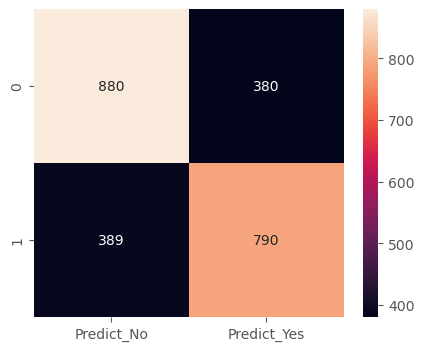

In [274]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(test_y, y_pred, labels=[0,1])
cm
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predict_No','Predict_Yes']])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True,fmt='d');

Model is predicting status 790 times (TP), 389 (FN) misclassifications and 880 (TN) and 380 (FP) misclassifications.

In [275]:
# Calling evaluation_metrices function 
precision, recall, fscore = evaluation_metrices(y_pred,train_x,train_y,test_x,test_y)

In [276]:
# Storing model results 
model_results.loc[len(model_results.index)] = ["XGBClassifier - Hyperparameter tuning", train_acc, test_acc, precision, recall, fscore]

In [277]:
model_results

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F-Score
0,DecisionTreeClassifier,0.9543,0.6384,0.6279,0.6183,0.6231
1,DecisionTreeClassifier - After Hypertuning,0.7000,0.6650,0.7268,0.4919,0.5867
2,RandomForestClassifier,0.9542,0.6412,0.6254,0.6429,0.6340
3,RandomForestClassifierr - Hyperparameter tuning,0.7041,0.6769,0.6846,0.6149,0.6479
4,XGBClassifier,0.7708,0.6777,0.6642,0.6743,0.6692
5,XGBClassifier - Hyperparameter tuning,0.6961,0.6847,0.6752,0.6701,0.6726


<a id="ID_result"></a>
INDEX | [1.0 Intro](#ID_intr) | [2.0 Lit. Review](#ID_lit) | [3.0 Research Question](#ID_research) | [4.0 Methodology](#ID_method) | [5.0 Data Understanding and Exploration](#ID_data) | [6.0 Model Building and Improvement](#ID_model) | [7.0 Results and Discussion](#ID_result) | [8.0 Conclusion](#ID_conclusion) | [Bibliography](#ID_biblio)

## 7.0 Results and Discussion

As this is the problem of Classification.A confusion matrix represents the prediction summary in matrix form. It shows how many prediction are correct and incorrect per class. It helps in understanding the classes that are being confused by model as other class.


The decision tree classifier model gives a training accuracy of 95% which is very high and is the classic example of overfitting. So, it cannot be generalized while the test accuracy is 63% which is quite low. The confusion matrix gives 729 (TP) and 828 (TN) which tells that both classes are predicted equally well. 
To further increase the Test accuracy some tuning is need.l. For this reason, Randomized Search CV is used which gives the train accuracy of 69.99 % and Test accuracy of 66.50% which indicates that the problem of overfitting is solved but overall accuracy has not improved that much. In this case the confusion matrix gives 580 (TP) and 1042 (TN) which indicates that model is predicting class0 much better than class The prcision score has improved while the recall value has gone down.


1
Similarly whem Random Forest Classifier model runs it gives a test accuracy of 64% and a very high train accuracy of 95%. .


In [278]:
model_results

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F-Score
0,DecisionTreeClassifier,0.9543,0.6384,0.6279,0.6183,0.6231
1,DecisionTreeClassifier - After Hypertuning,0.7000,0.6650,0.7268,0.4919,0.5867
2,RandomForestClassifier,0.9542,0.6412,0.6254,0.6429,0.6340
3,RandomForestClassifierr - Hyperparameter tuning,0.7041,0.6769,0.6846,0.6149,0.6479
4,XGBClassifier,0.7708,0.6777,0.6642,0.6743,0.6692
5,XGBClassifier - Hyperparameter tuning,0.6961,0.6847,0.6752,0.6701,0.6726


These results seem to be from a classification task where different machine learning models have been trained and evaluated on a dataset. Here's how to interpret the key metrics:

1. **Train Accuracy**: This represents the accuracy of the model on the training data, which measures how well the model predicts the labels of the data it was trained on.

2. **Test Accuracy**: This indicates the accuracy of the model on unseen data, which measures how well the model generalizes to new, unseen instances.

3. **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of positive predictions. A high precision indicates that the model does not return many false positives.

4. **Recall**: Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It is a measure of the completeness of positive predictions. A high recall indicates that the model can capture a large proportion of positive instances.

5. **F-Score**: The F1 score is the harmonic mean of precision and recall. It combines both precision and recall into a single metric. It is a good way to compare models if you have an uneven class distribution.

Now, let's analyze the results for each model:

- **DecisionTreeClassifier**:
    - Initial: Moderate training accuracy but relatively low test accuracy, precision, recall, and F-score.
    - After Hypertuning: Training accuracy reduced significantly, but test accuracy, precision, recall, and F-score improved slightly. However, it still seems to underperform compared to other models.

- **RandomForestClassifier**:
    - Initial: Similar performance to the DecisionTreeClassifier with slightly higher test accuracy, precision, recall, and F-score.
    - Hyperparameter tuning: Similar improvement trends to the DecisionTreeClassifier, but with slightly better overall performance.

- **XGBClassifier**:
    - Initial: Better performance compared to DecisionTreeClassifier and RandomForestClassifier.
    - Hyperparameter tuning: Slight improvements in test accuracy, precision, recall, and F-score.

In summary, the XGBClassifier appears to be the best-performing model overall, especially after hyperparameter tuning. However, it's essential to consider other factors like computational resources and interpretability when choosing the final model.

<a id="ID_conclusion"></a>
INDEX | [1.0 Intro](#ID_intr) | [2.0 Lit. Review](#ID_lit) | [3.0 Research Question](#ID_research) | [4.0 Methodology](#ID_method) | [5.0 Data Understanding and Exploration](#ID_data) | [6.0 Model Building and Improvement](#ID_model) | [7.0 Results and Discussion](#ID_result) | [8.0 Conclusion](#ID_conclusion) | [Bibliography](#ID_biblio)

## 8.0 Conclusion

In conclusion this paper has carried classification of bank branches being closed on the basis of distance of the post office. As the with the three models used the best accuarcy score is 68.47% which does not say with confidence that there is good chances of this possibility. It just says that distance of post office can be a factor in closure of banks but this is not 100% accurate. There can be some other factors which can be taken in consideration like ??

LIMITATIONS-
we can also see which year has maximum closed branches and maybe because of recession or COVID-19 and any particular month where the branches are closed.

<a id="ID_biblio"></a>
INDEX | [1.0 Intro](#ID_intr) | [2.0 Lit. Review](#ID_lit) | [3.0 Research Question](#ID_research) | [4.0 Methodology](#ID_method) | [5.0 Data Understanding and Exploration](#ID_data) | [6.0 Model Building and Improvement](#ID_model) | [7.0 Results and Discussion](#ID_result) | [8.0 Conclusion](#ID_conclusion) | [Bibliography](#ID_biblio)

## Bibliography 


* Clark, S., Newing, A., Hood, N. & Birkin, M. (2023) Retail banking closures in the United Kingdom. Are neighbourhood characteristics associated with retail bank branch closures? Transactions of the Institute of British Geographers, 00, 1–20. Available from: https://doi.org/10.1111/tran.12656
 
* Everyday banking (no date) Everyday Banking | Personal and Business Accounts | Post Office. Available at: https://www.postoffice.co.uk/everydaybanking (Accessed: 21 April 2024). 

* Sonea, A. and Westerholt, R. (2021) Geographic and temporal access to basic banking services offered through post offices in Wales - Applied Spatial Analysis and policy, SpringerLink. Available at: https://link.springer.com/article/10.1007/s12061-021-09386-3 (Accessed: 18 April 2024).

* Sonea, A., Guo,W., & Jarvis, S (2019). Exploratory spatial analysis of access to physical and digital retail banking channels. Tech rep., Think Forward Initiative, Amsterdam.

* Sklearn.model_selection.RANDOMIZEDSEARCHCV (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html (Accessed: 16 April 2024).

* Smiti, A. (2020) ‘When machine learning meets medical world: Current status and future challenges’, Computer Science Review, 37, p. 100280. doi:10.1016/j.cosrev.2020.100280. 

* The Post Office Network Report 2021. Available at: https://corporate.postoffice.co.uk/media/lzkfri54/network-report-2020-21-regular-print-final-2.pdf (Accessed: 18 April 2024). 

* Treasury, H. (2022) New powers to protect access to cash, GOV.UK. Available at: https://www.gov.uk/government/news/new-powers-to-protect-access-to-cash (Accessed: 12 April 2024).

* UK Bank & Building Societies Points (2021) Geolytix. Available at: https://geolytix.com/blog/banking-building-societies-locations/ (Accessed: 18 April 2024). 


* University of Bristol (2022) Bank closures drive people to the post office to handle cash, September: Bank closure impact on Post Offices | News and features | University of Bristol. Available at: https://www.bristol.ac.uk/news/2022/september/bank-closure-impact-on-post-offices.html (Accessed: 12 April 2024).

* Which firms does the PRA regulate? (2023) Bank of England. Available at: https://www.bankofengland.co.uk/prudential-regulation/authorisations/which-firms-does-the-pra-regulate (Accessed: 13 April 2024).


  

  
